<a href="https://colab.research.google.com/github/Palak-08/EDA/blob/main/21BDS0163_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 1

```
Step 1: Loading the Dataset, Exploring Dimensions, Summary, and Data Handling
```



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler


Step 1: Load Dataset and Explore

In [ ]:
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv'
df = pd.read_csv(url, sep=';')

1.2 Explore Dimensions and Summary

In [ ]:
print(df.shape)
print(df.info())
print(df.describe(include='all'))


(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

1.3 Data Handling: Missing Values

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)


<ipython-input-6-cfaaac2f6ccd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-6-cfaaac2f6ccd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Step 2: Data Cleaning and Handling
 2.1 Remove Duplicates

In [ ]:
df.drop_duplicates(inplace=True)


2.2 Outlier Detection and Filtering

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    df = df[(z_scores < 3)]

Step 3: Univariate Analysis
 3.1 Histogram

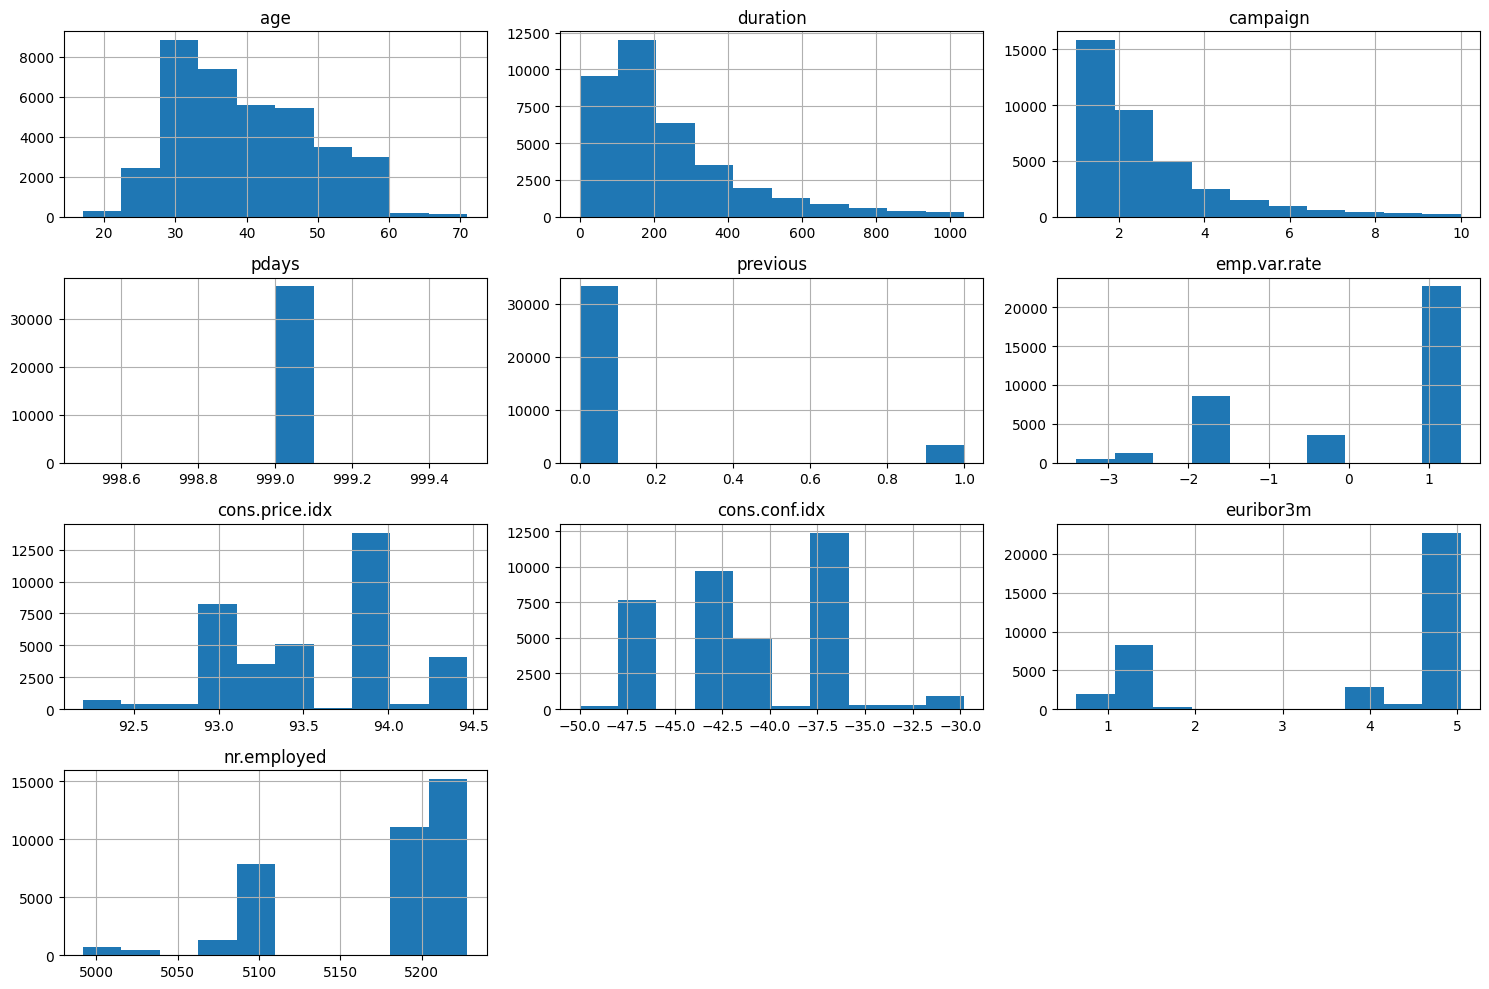

In [ ]:
df[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

3.2 Density Plot for 'duration'

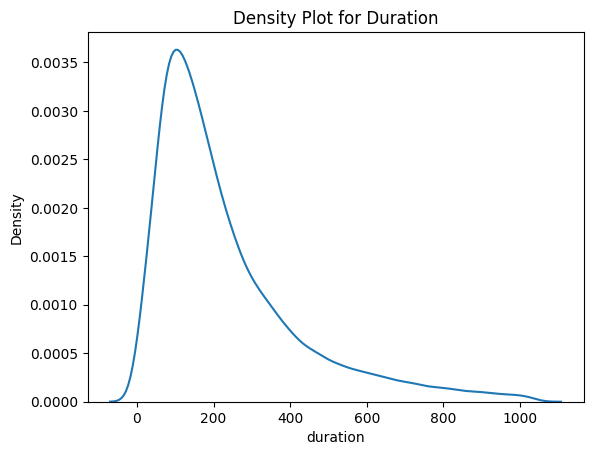

In [ ]:
sns.kdeplot(df['duration'])
plt.title('Density Plot for Duration')
plt.show()

3.3 Box Plot for 'duration'

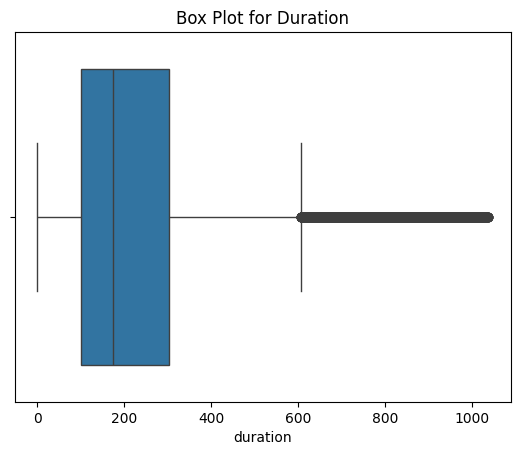

In [ ]:
sns.boxplot(x=df['duration'])
plt.title('Box Plot for Duration')
plt.show()

3.4 Bar Plot

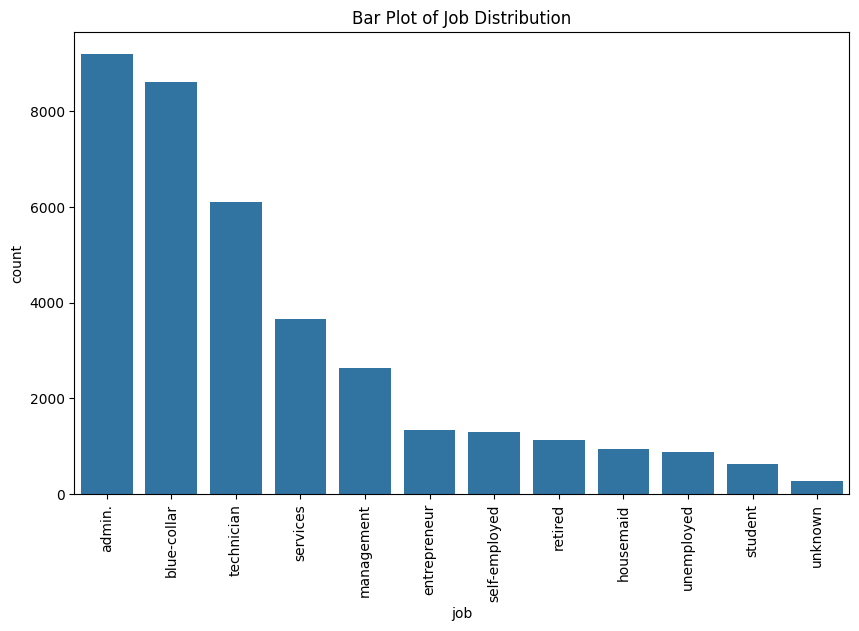

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='job', data=df, order=df['job'].value_counts().index)
plt.title('Bar Plot of Job Distribution')
plt.xticks(rotation=90)
plt.show()

3.5 Pie Plot

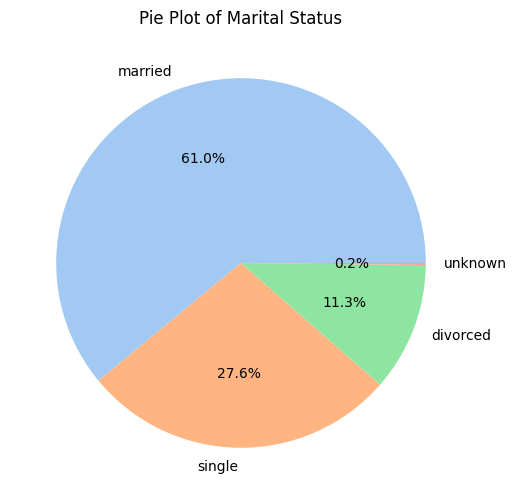

In [ ]:
df['marital'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=sns.color_palette('pastel'))
plt.title('Pie Plot of Marital Status')
plt.ylabel('')
plt.show()


3.6 Dotplot

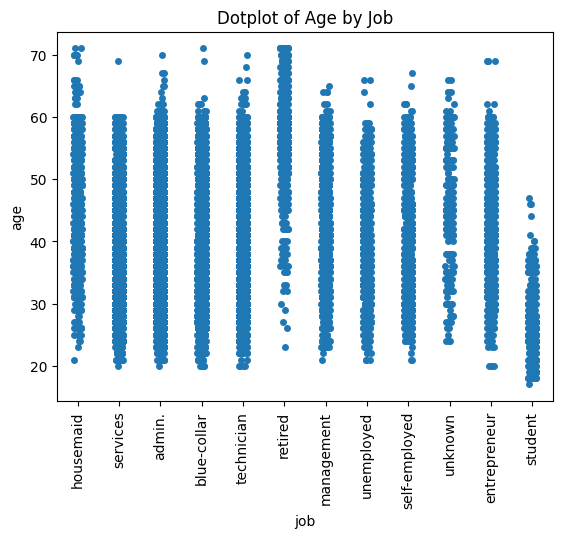

In [ ]:
sns.stripplot(x='job', y='age', data=df, jitter=True)
plt.title('Dotplot of Age by Job')
plt.xticks(rotation=90)
plt.show()

3.7 Boxplot

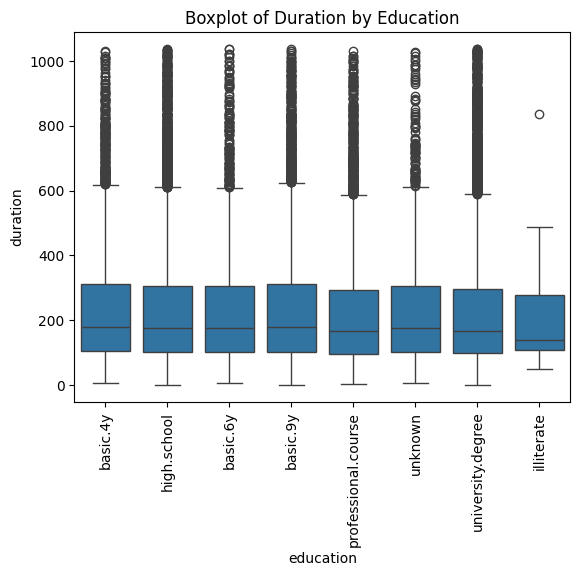

In [ ]:
sns.boxplot(x='education', y='duration', data=df)
plt.title('Boxplot of Duration by Education')
plt.xticks(rotation=90)
plt.show()

Step 4: Bivariate Analysis

4.1 Contingency Table

In [ ]:
cont_table = pd.crosstab(df['marital'], df['housing'])
print(cont_table)

housing      no  unknown    yes
marital                        
divorced   1899      108   2124
married   10228      538  11609
single     4456      239   5423
unknown      33        1     31


 4.2 Categorical vs Categorical Analysis


4.2.1 Stacked Bar Chart

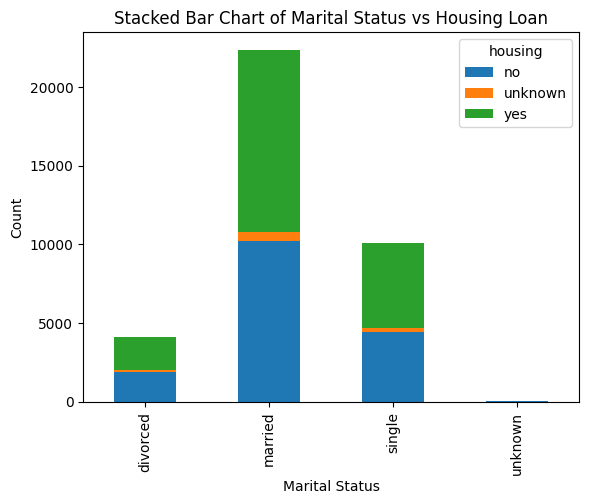

In [ ]:
cont_table.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Housing Loan')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

4.2.2 Stacked Bar Plot with Seaborn

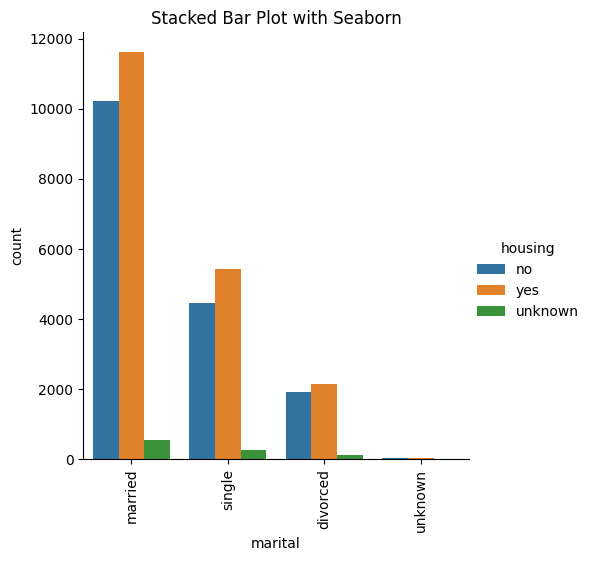

In [ ]:
sns.catplot(x='marital', hue='housing', kind='count', data=df)
plt.title('Stacked Bar Plot with Seaborn')
plt.xticks(rotation=90)
plt.show()

4.2.3 Grouped Bar Plot

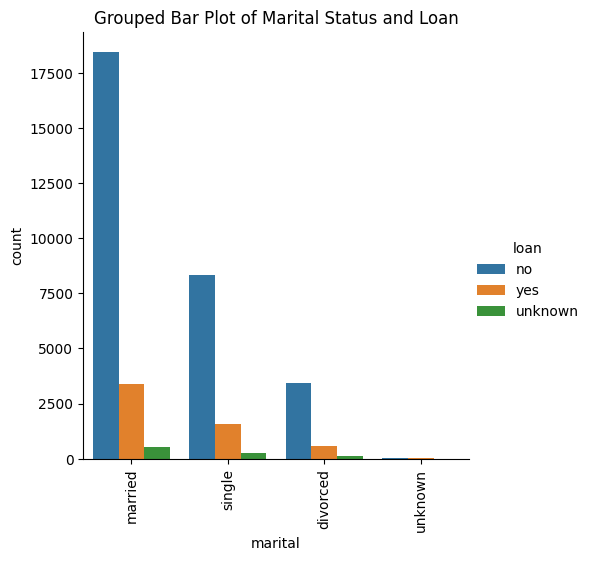

In [ ]:
sns.catplot(x='marital', hue='loan', kind='count', data=df)
plt.title('Grouped Bar Plot of Marital Status and Loan')
plt.xticks(rotation=90)
plt.show()

4.3 Categorical vs Quantitative Analysis


4.3.1 Bar Chart

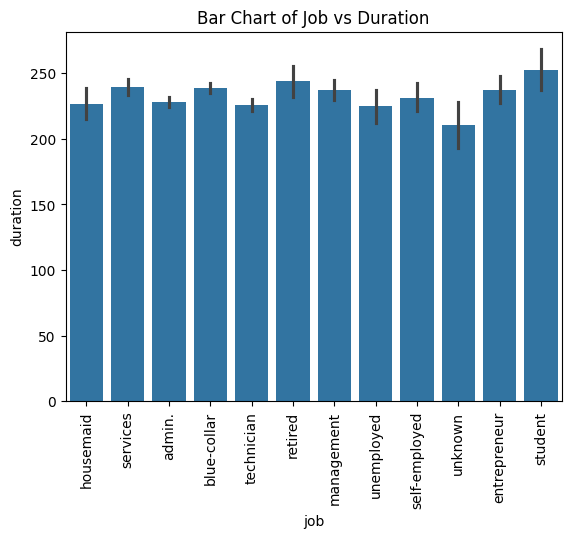

In [ ]:
sns.barplot(x='job', y='duration', data=df)
plt.title('Bar Chart of Job vs Duration')
plt.xticks(rotation=90)
plt.show()

4.3.2 Density Plot

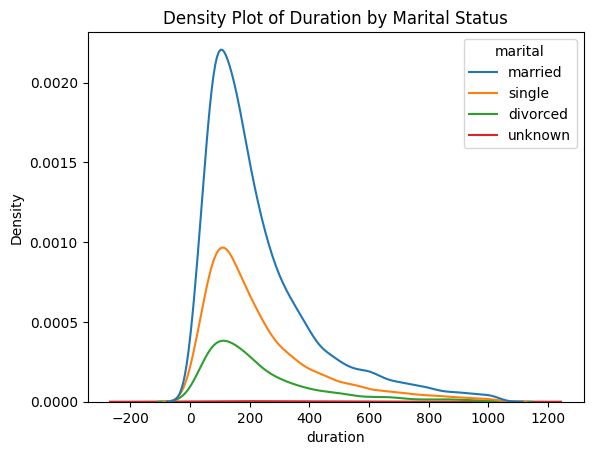

In [ ]:
sns.kdeplot(x='duration', hue='marital', data=df)
plt.title('Density Plot of Duration by Marital Status')
plt.show()


4.3.3 Box Plot

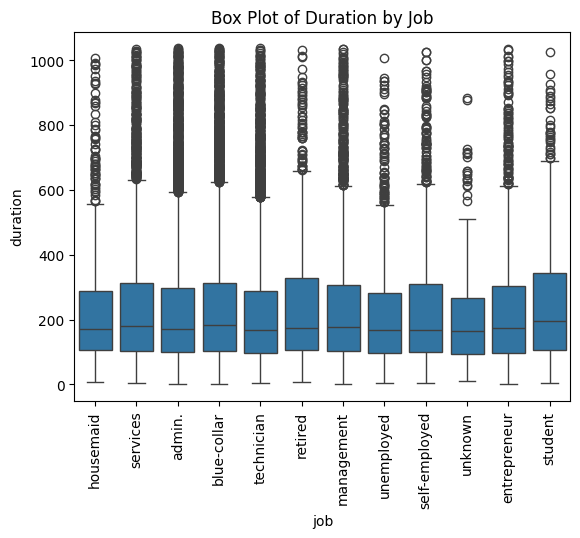

In [ ]:
sns.boxplot(x='job', y='duration', data=df)
plt.title('Box Plot of Duration by Job')
plt.xticks(rotation=90)
plt.show()

4.3.4 Violin Plot

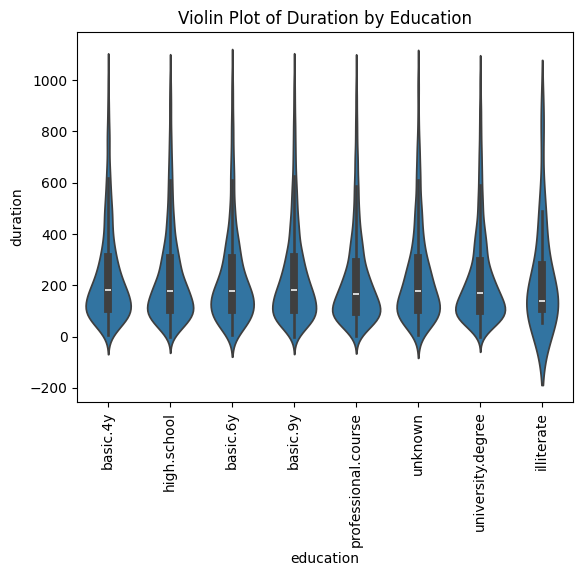

In [ ]:
sns.violinplot(x='education', y='duration', data=df)
plt.title('Violin Plot of Duration by Education')
plt.xticks(rotation=90)
plt.show()


4.3.5 Combined Violin and Box Plots

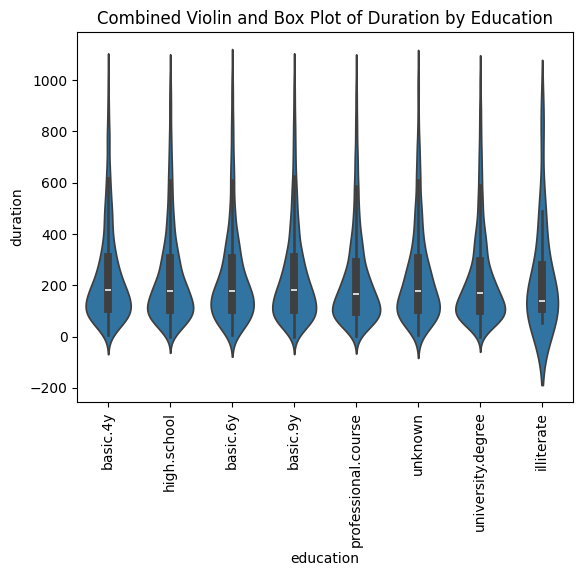

In [ ]:
sns.violinplot(x='education', y='duration', data=df, inner='box')
plt.title('Combined Violin and Box Plot of Duration by Education')
plt.xticks(rotation=90)
plt.show()


4.4 Quantitative vs Quantitative Analysis

 4.4.1 Line Plot

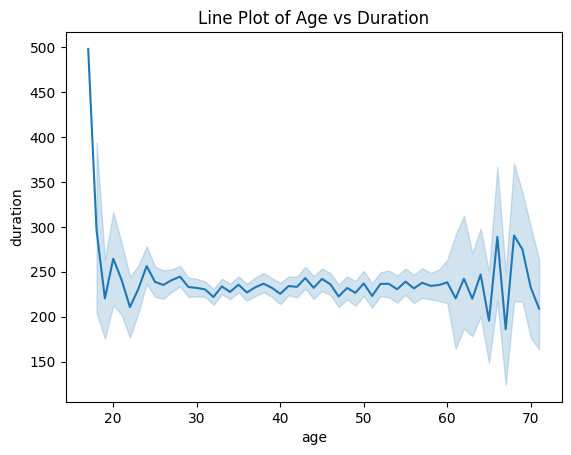

In [ ]:
sns.lineplot(x='age', y='duration', data=df)
plt.title('Line Plot of Age vs Duration')
plt.show()

4.4.2 Correlation Heatmap

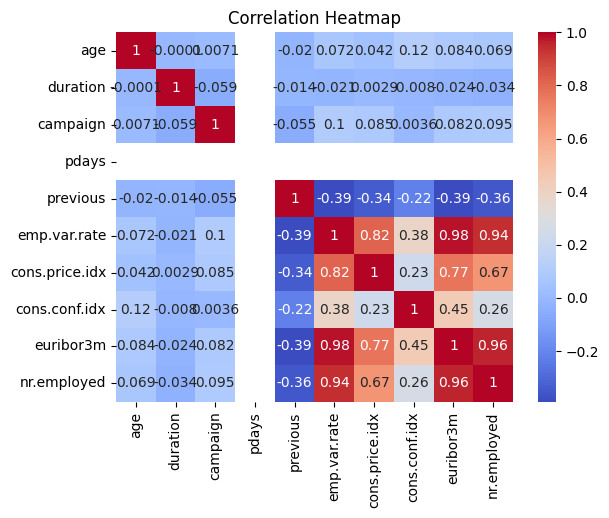

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

4.4.3 Scatter Plot

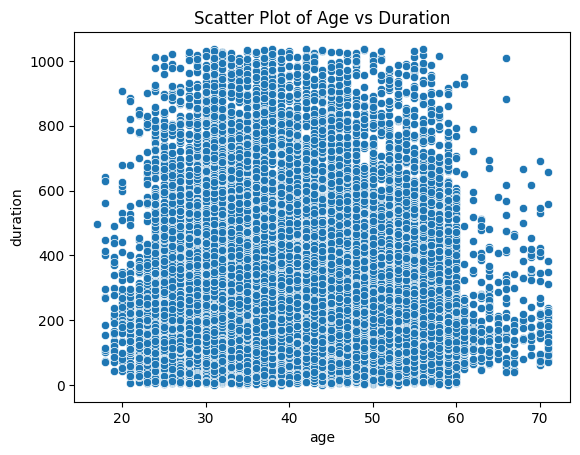

In [ ]:
sns.scatterplot(x='age', y='duration', data=df)
plt.title('Scatter Plot of Age vs Duration')
plt.show()

Step 5: Multivariate Analysis

5.1 Scatter Plot with Color as a Third Variable

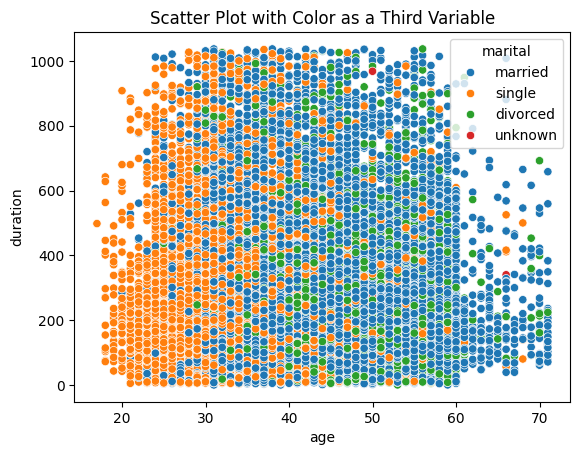

In [ ]:
sns.scatterplot(x='age', y='duration', hue='marital', data=df)
plt.title('Scatter Plot with Color as a Third Variable')
plt.show()

5.2 Scatter Plot with Color and Shape as Variables

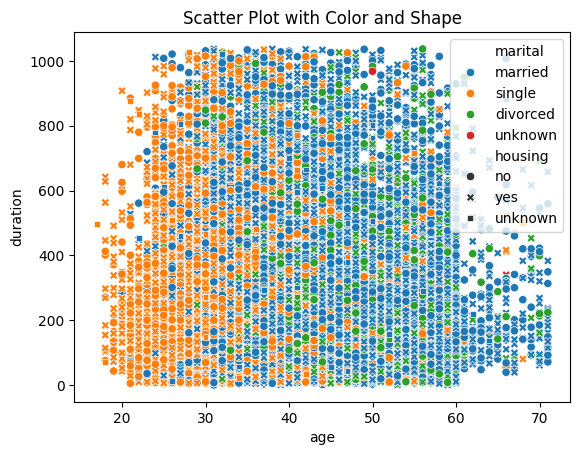

In [ ]:
sns.scatterplot(x='age', y='duration', hue='marital', style='housing', data=df)
plt.title('Scatter Plot with Color and Shape')
plt.show()

 5.3 Scatter Plot with Color and Size as Variables


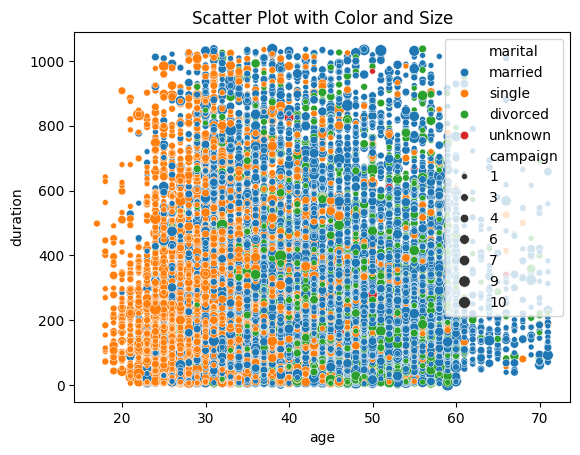

In [ ]:
sns.scatterplot(x='age', y='duration', hue='marital', size='campaign', data=df)
plt.title('Scatter Plot with Color and Size')
plt.show()

 5.4 Bubble Plot


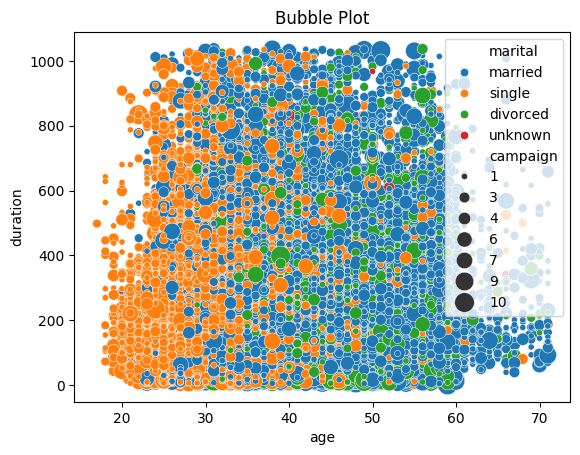

In [ ]:
sns.scatterplot(x='age', y='duration', size='campaign', hue='marital', data=df, sizes=(20, 200))
plt.title('Bubble Plot')
plt.show()

 5.5 Faceted Histogram

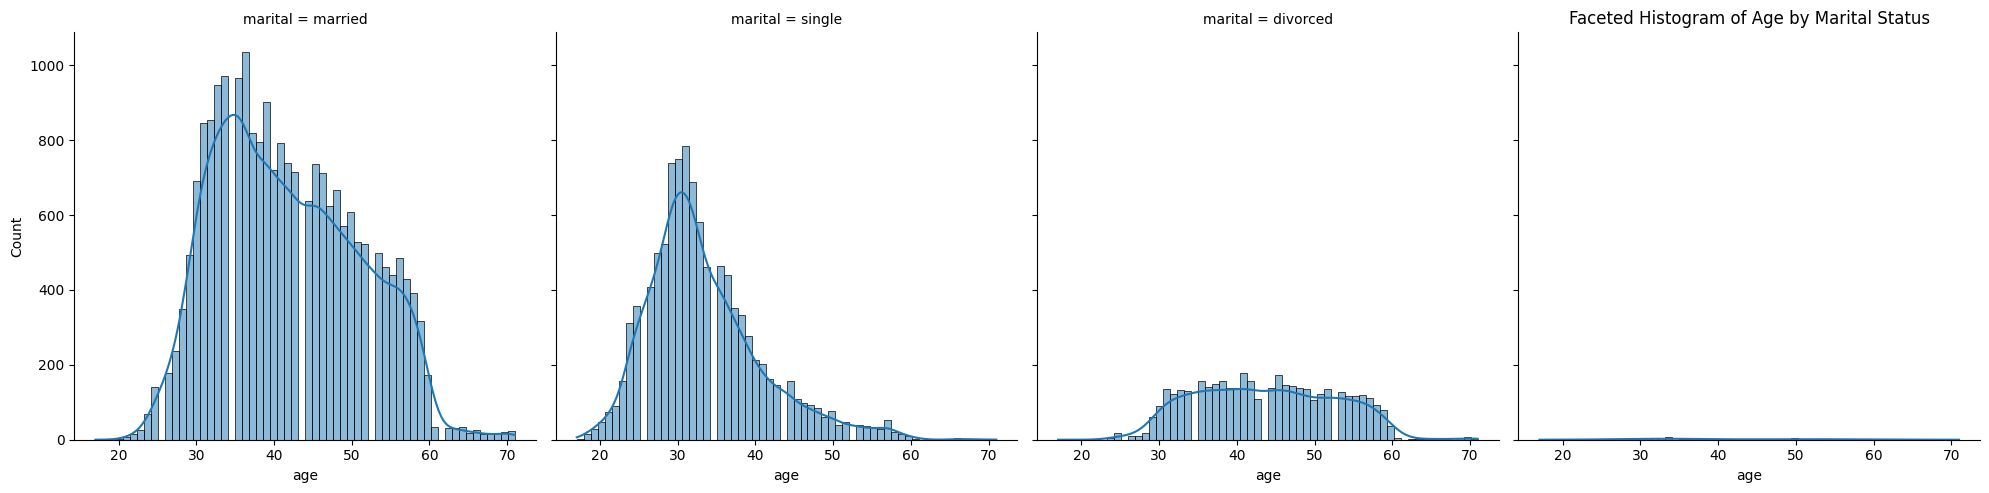

In [ ]:
sns.displot(df, x='age', col='marital', kde=True)
plt.title('Faceted Histogram of Age by Marital Status')
plt.show()

 5.6 Pairplot

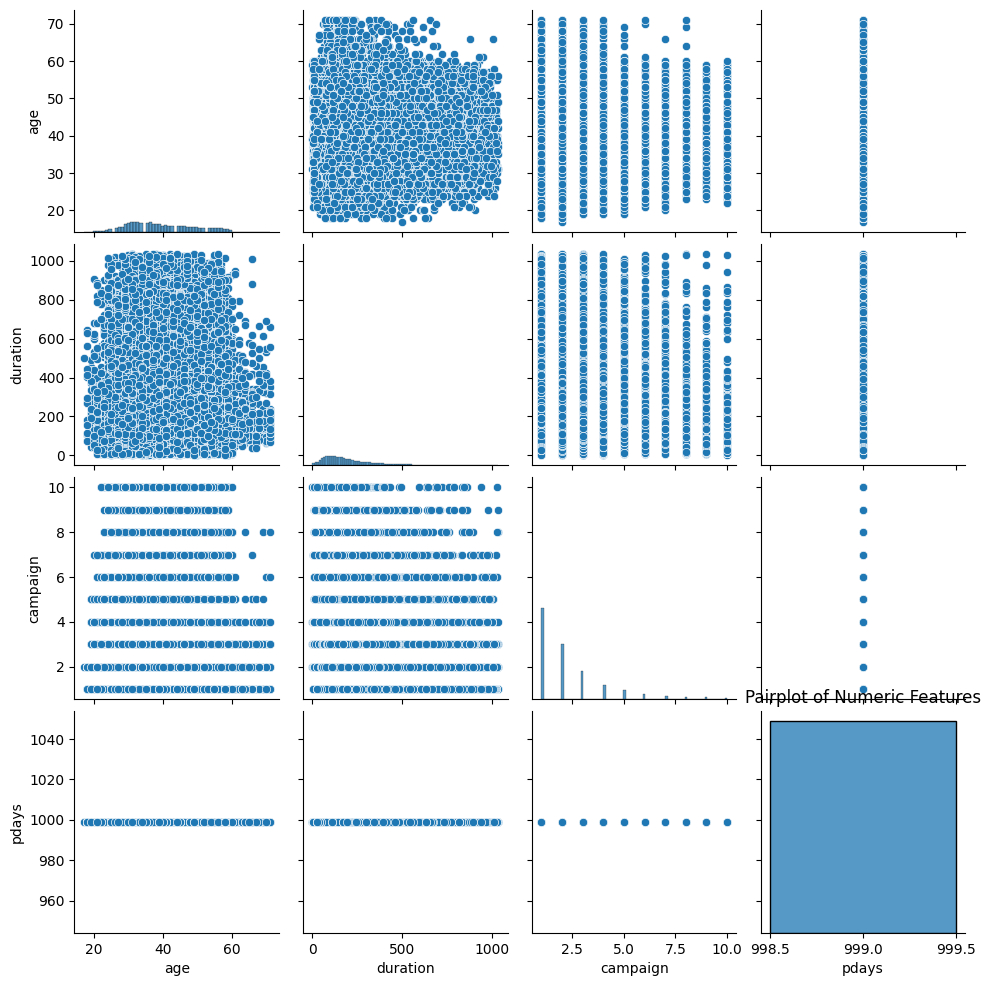

In [ ]:
sns.pairplot(df[['age', 'duration', 'campaign', 'pdays']])
plt.title('Pairplot of Numeric Features')
plt.show()

Module 2

6.1 Merging Data

Simulating a merge with a sample dataframe

6.2 Reshaping with Hierarchical Indexing

In [ ]:
reshaped = df.pivot_table(values='duration', index='age', columns='marital', aggfunc='mean')
print(reshaped.head())

marital  divorced  married      single  unknown
age                                            
17            NaN      NaN  420.000000      NaN
18            NaN      NaN  321.785714      NaN
19            NaN      NaN  271.500000      NaN
20            NaN   285.00  288.546875      NaN
21            NaN   456.25  247.904255      NaN


6.3 Transformation Techniques

In [ ]:

df['log_duration'] = np.log1p(df['duration'])

6.4 Discretization and Binning

In [ ]:
df['age_bins'] = pd.cut(df['age'], bins=5, labels=['Young', 'Young Adult', 'Middle-Aged', 'Senior', 'Elderly'])


Module 3: Time-Series Analysis

 7.1 Simulate Time Index

In [ ]:
df['time_index'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')


 7.2 Check Missing Values

In [ ]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
log_duration      0
age_bins          0
time_index        0
dtype: int64


 7.3 Plot Time Series

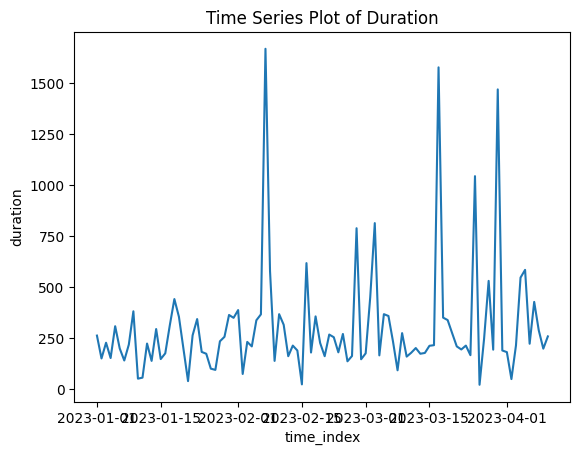

In [ ]:
sns.lineplot(x='time_index', y='duration', data=df.head(100))
plt.title('Time Series Plot of Duration')
plt.show()

7.4 Decompose Dataset

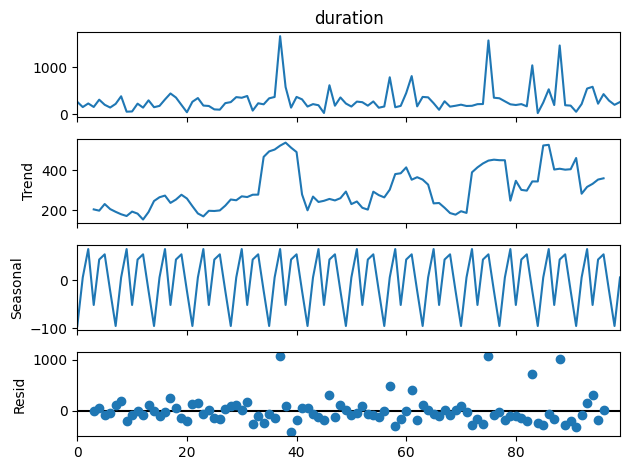

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['duration'].head(100), model='additive', period=7)
result.plot()
plt.show()

 7.5 Make Dataset Stationary

In [ ]:
df['duration_diff'] = df['duration'] - df['duration'].shift(1)

7.6 Plot Box Plot Across Categories

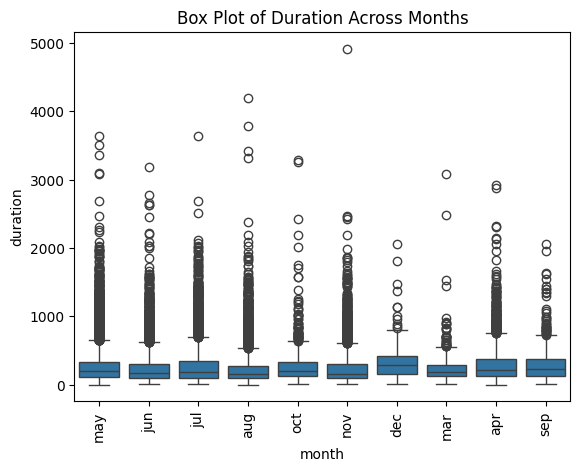

In [ ]:
sns.boxplot(x='month', y='duration', data=df)
plt.title('Box Plot of Duration Across Months')
plt.xticks(rotation=90)
plt.show()

Module - 4

8. 1D Data Statistical Analysis





8.1 Measures of Central Tendency

8.1.1 Mean and Median


In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')

# Calculate mean and median for numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
mean_median = df[num_cols].agg(['mean', 'median'])

print("Mean and Median:")
print(mean_median)

Mean and Median:
             age   duration  campaign       pdays  previous  emp.var.rate  \
mean    40.02406  258.28501  2.567593  962.475454  0.172963      0.081886   
median  38.00000  180.00000  2.000000  999.000000  0.000000      1.100000   

        cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
mean         93.575664       -40.5026   3.621291  5167.035911  
median       93.749000       -41.8000   4.857000  5191.000000  


8.2.1 Range, IQR, and Standard Deviation

In [3]:
stats = df[num_cols].agg(['min', 'max', lambda x: x.max()-x.min(),
                         'std', lambda x: x.quantile(0.75)-x.quantile(0.25)])
stats = stats.rename(index={'<lambda_0>': 'range', '<lambda_1>': 'IQR'})

print("\nRange, IQR and Standard Deviation:")
print(stats)


Range, IQR and Standard Deviation:
               age     duration   campaign       pdays  previous  \
min       17.00000     0.000000   1.000000    0.000000  0.000000   
max       98.00000  4918.000000  56.000000  999.000000  7.000000   
<lambda>  81.00000  4918.000000  55.000000  999.000000  7.000000   
std       10.42125   259.279249   2.770014  186.910907  0.494901   
<lambda>  15.00000   217.000000   2.000000    0.000000  0.000000   

          emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
min           -3.40000        92.20100     -50.800000   0.634000  4963.600000  
max            1.40000        94.76700     -26.900000   5.045000  5228.100000  
<lambda>       4.80000         2.56600      23.900000   4.411000   264.500000  
std            1.57096         0.57884       4.628198   1.734447    72.251528  
<lambda>       3.20000         0.91900       6.300000   3.617000   129.000000  


8.3 Frequency Distribution

8.3.1 Histogram

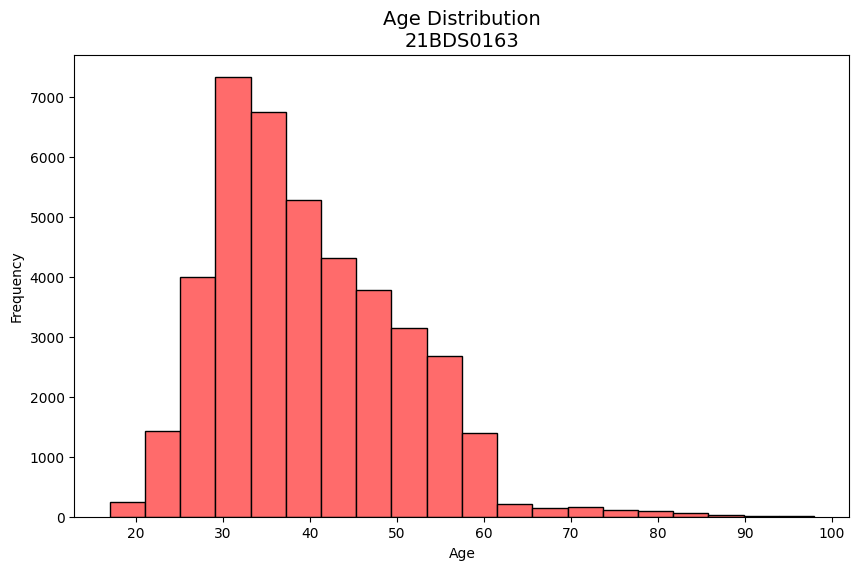

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['age'].hist(bins=20, color='#FF6B6B', edgecolor='black')
plt.title('Age Distribution\n21BDS0163', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

8.3.2 Relative Frequency Distribution

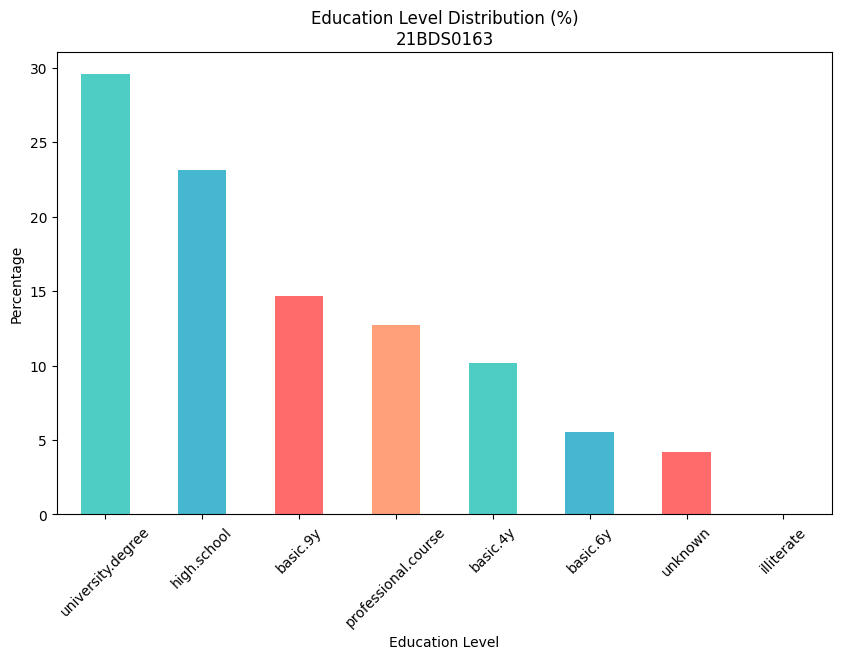

In [5]:
plt.figure(figsize=(10,6))
(df['education'].value_counts(normalize=True)*100).plot(
    kind='bar',
    color=['#4ECDC4','#45B7D1','#FF6B6B','#FFA07A']
)
plt.title('Education Level Distribution (%)\n21BDS0163')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

8.3.3 Cumulative Frequency Distribution

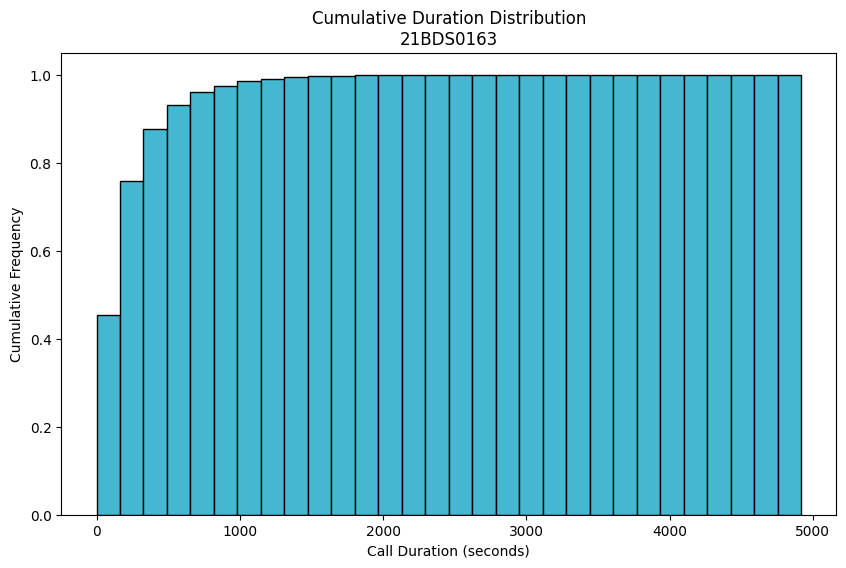

In [6]:
plt.figure(figsize=(10,6))
df['duration'].hist(bins=30, cumulative=True, density=True,
                   color='#45B7D1', edgecolor='black')
plt.title('Cumulative Duration Distribution\n21BDS0163')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Cumulative Frequency')
plt.grid(False)
plt.show()

8.4 Categorical Variable Analysis


Assuming you want to analyze the smoothness_category:

8.4.1 Pie Plot

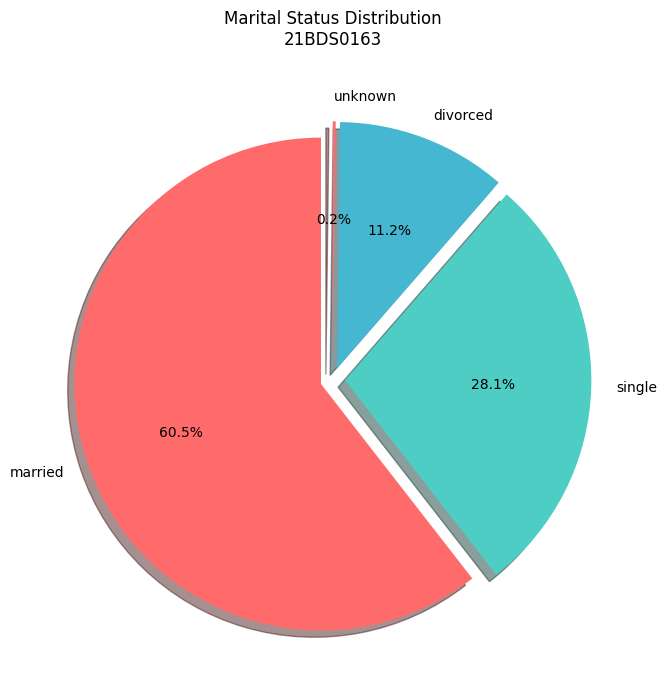

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')

# Get value counts
marital_counts = df['marital'].value_counts()

# Create pie chart
plt.figure(figsize=(8,8))
marital_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#FF6B6B','#4ECDC4','#45B7D1'],
    explode=[0.05]*len(marital_counts),  # Match explode length to data
    shadow=True,
    startangle=90
)
plt.title('Marital Status Distribution\n21BDS0163', pad=20)
plt.ylabel('')
plt.show()

8.4.2 Stacked Bar Plot

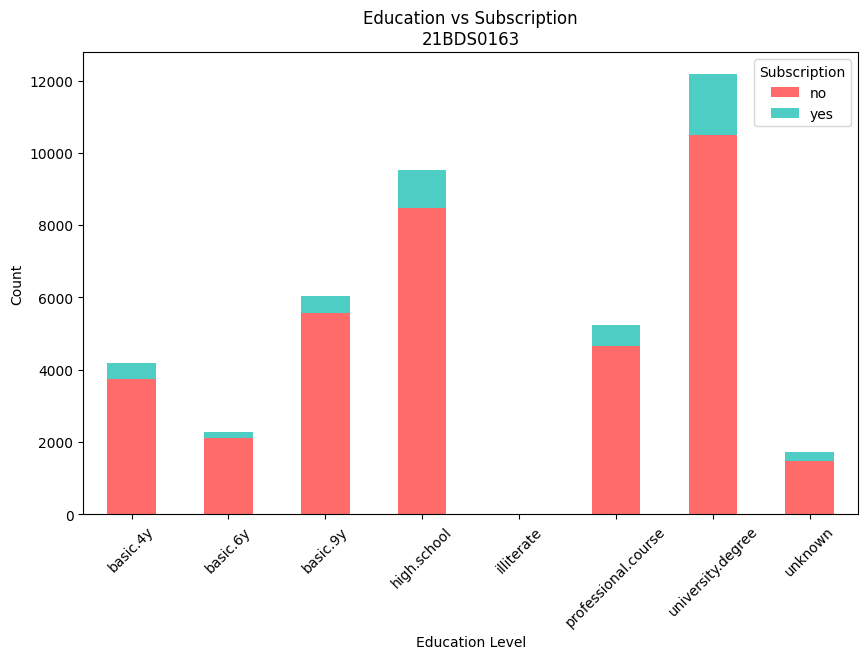

In [9]:
cross_tab = pd.crosstab(df['education'], df['y'])
cross_tab.plot(kind='bar', stacked=True,
              color=['#FF6B6B','#4ECDC4'],
              figsize=(10,6))
plt.title('Education vs Subscription\n21BDS0163')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.show()

9. Exploratory Data Analysis for Structured data - 2D Analysis

9.1 Create 2-Way Contingency Tables for Categorical-Categorical,


Numerical-Numerical, and Categorical-Numerical Variables

In [10]:
# Categorical-Categorical
print("Job vs Marital Status:")
print(pd.crosstab(df['job'], df['marital']))

# Numerical-Numerical (binned)
print("\nAge vs Duration (binned):")
print(pd.crosstab(pd.cut(df['age'],5), pd.cut(df['duration'],5)))

# Categorical-Numerical
print("\nJob vs Duration (mean):")
print(df.groupby('job')['duration'].mean())

Job vs Marital Status:
marital        divorced  married  single  unknown
job                                              
admin.             1280     5253    3875       14
blue-collar         728     6687    1825       14
entrepreneur        179     1071     203        3
housemaid           161      777     119        3
management          331     2089     501        3
retired             348     1274      93        5
self-employed       133      904     379        5
services            532     2294    1137        6
student               9       41     824        1
technician          774     3670    2287       12
unemployed          124      634     251        5
unknown              13      234      74        9

Age vs Duration (binned):
duration        (-4.918, 983.6]  (983.6, 1967.2]  (1967.2, 2950.8]  \
age                                                                  
(16.919, 33.2]            12675              311                16   
(33.2, 49.4]              19631         

9.2 Create a 3-Way Contingency Table

In [11]:
print("Job vs Marital vs Subscription:")
print(pd.crosstab([df['job'], df['marital']], df['y']))

Job vs Marital vs Subscription:
y                         no  yes
job           marital            
admin.        divorced  1148  132
              married   4601  652
              single    3309  566
              unknown     12    2
blue-collar   divorced   675   53
              married   6266  421
              single    1664  161
              unknown     11    3
entrepreneur  divorced   165   14
              married    983   88
              single     182   21
              unknown      2    1
housemaid     divorced   145   16
              married    703   74
              single     103   16
              unknown      3    0
management    divorced   292   39
              married   1863  226
              single     438   63
              unknown      3    0
retired       divorced   256   92
              married    945  329
              single      81   12
              unknown      4    1
self-employed divorced   117   16
              married    822   82
              si

9.3 Apply Row Profile, Column Profile, Relative Frequency, and Chi-Square Test


Row Profile (%):
marital        divorced  married  single  unknown
job                                              
admin.            12.28    50.40   37.18     0.13
blue-collar        7.87    72.26   19.72     0.15
entrepreneur      12.29    73.56   13.94     0.21
housemaid         15.19    73.30   11.23     0.28
management        11.32    71.44   17.13     0.10
retired           20.23    74.07    5.41     0.29
self-employed      9.36    63.62   26.67     0.35
services          13.40    57.80   28.65     0.15
student            1.03     4.69   94.17     0.11
technician        11.48    54.43   33.92     0.18
unemployed        12.23    62.52   24.75     0.49
unknown            3.94    70.91   22.42     2.73

Column Profile (%):
marital        divorced  married  single  unknown
job                                              
admin.            27.75    21.07   33.50    17.50
blue-collar       15.78    26.83   15.78    17.50
entrepreneur       3.88     4.30    1.75     3.75
housemaid  

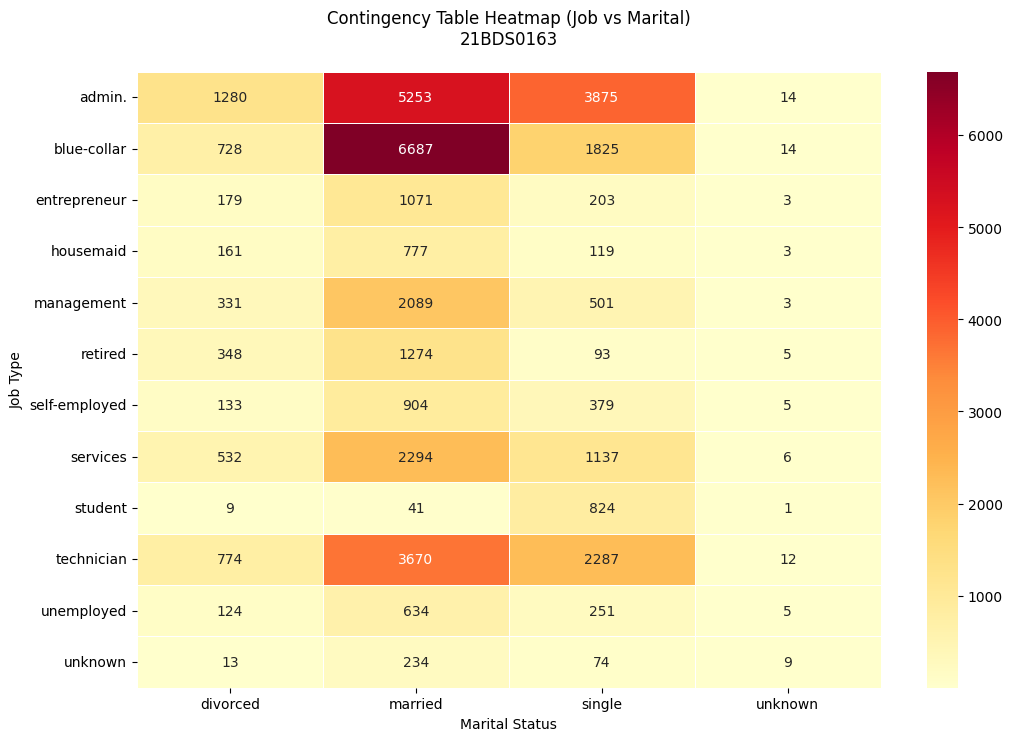

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')

# Select two categorical variables (job vs marital)
contingency_table = pd.crosstab(df['job'], df['marital'])

# 1. Row Profile (Row-wise percentages)
row_profile = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print("\nRow Profile (%):")
print(row_profile.round(2))

# 2. Column Profile (Column-wise percentages)
col_profile = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
print("\nColumn Profile (%):")
print(col_profile.round(2))

# 3. Relative Frequency (Overall percentages)
relative_freq = contingency_table / contingency_table.sum().sum() * 100
print("\nRelative Frequency (%):")
print(relative_freq.round(2))

# 4. Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns).round(2))

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlOrRd', linewidths=.5)
plt.title('Contingency Table Heatmap (Job vs Marital)\n21BDS0163', pad=20)
plt.xlabel('Marital Status')
plt.ylabel('Job Type')
plt.show()

9.4 Display Scatter Plot for 2 Variables

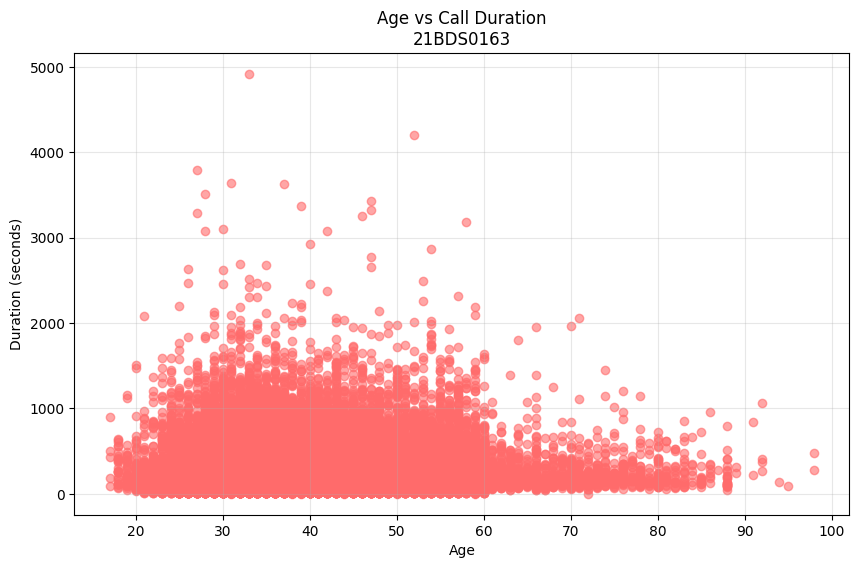

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df['age'], df['duration'], alpha=0.6, color='#FF6B6B')
plt.title('Age vs Call Duration\n21BDS0163')
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')
plt.grid(True, alpha=0.3)
plt.show()

9.5 3D Scatter Plot

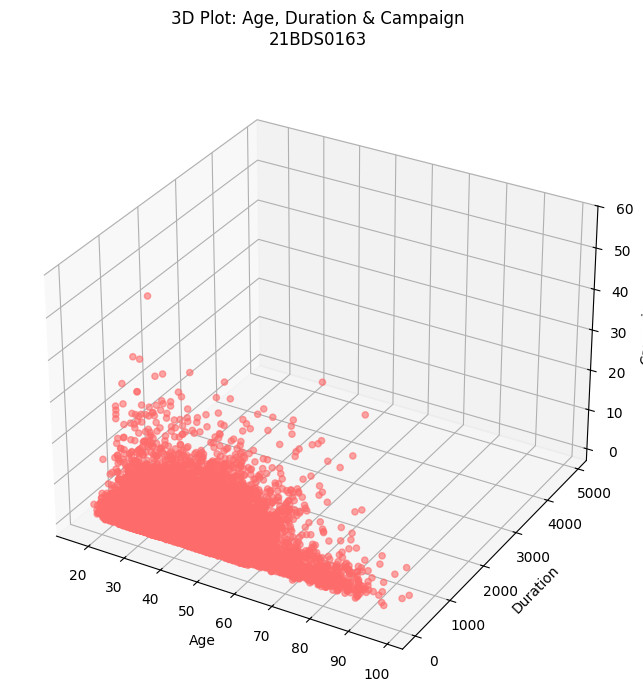

In [15]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['duration'], df['campaign'],
           c='#FF6B6B', marker='o', alpha=0.6)
ax.set_title('3D Plot: Age, Duration & Campaign\n21BDS0163', pad=20)
ax.set_xlabel('Age')
ax.set_ylabel('Duration')
ax.set_zlabel('Campaign')
plt.show()

9.6 2D Box Plot

<ipython-input-16-f6800d48b0e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job', y='duration', data=df,
<ipython-input-16-f6800d48b0e7>:2: UserWarning: 
The palette list has fewer values (3) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='job', y='duration', data=df,


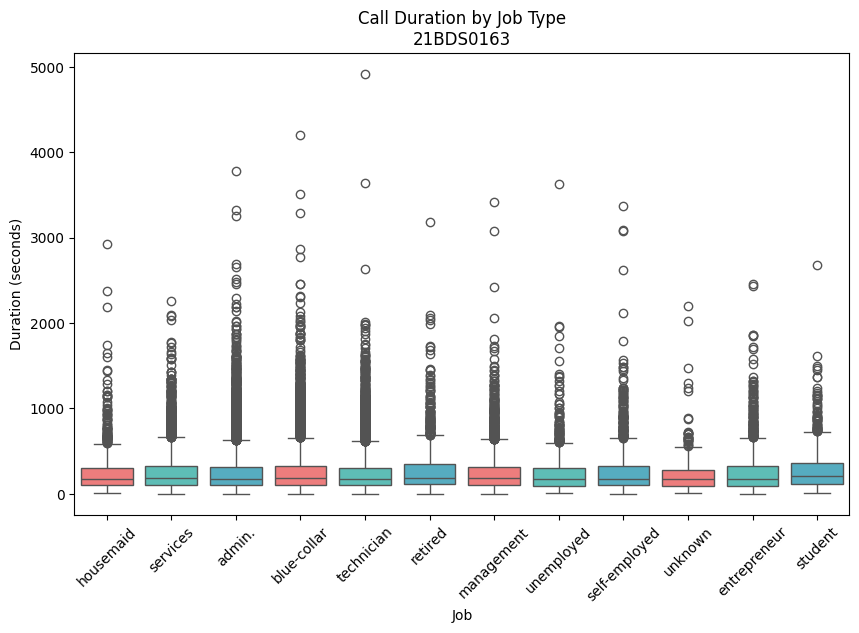

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='job', y='duration', data=df,
           palette=['#FF6B6B','#4ECDC4','#45B7D1'])
plt.title('Call Duration by Job Type\n21BDS0163')
plt.xlabel('Job')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)
plt.show()

9.7 Customize the 3D Scatter Plot (Color, Shape, Bars)

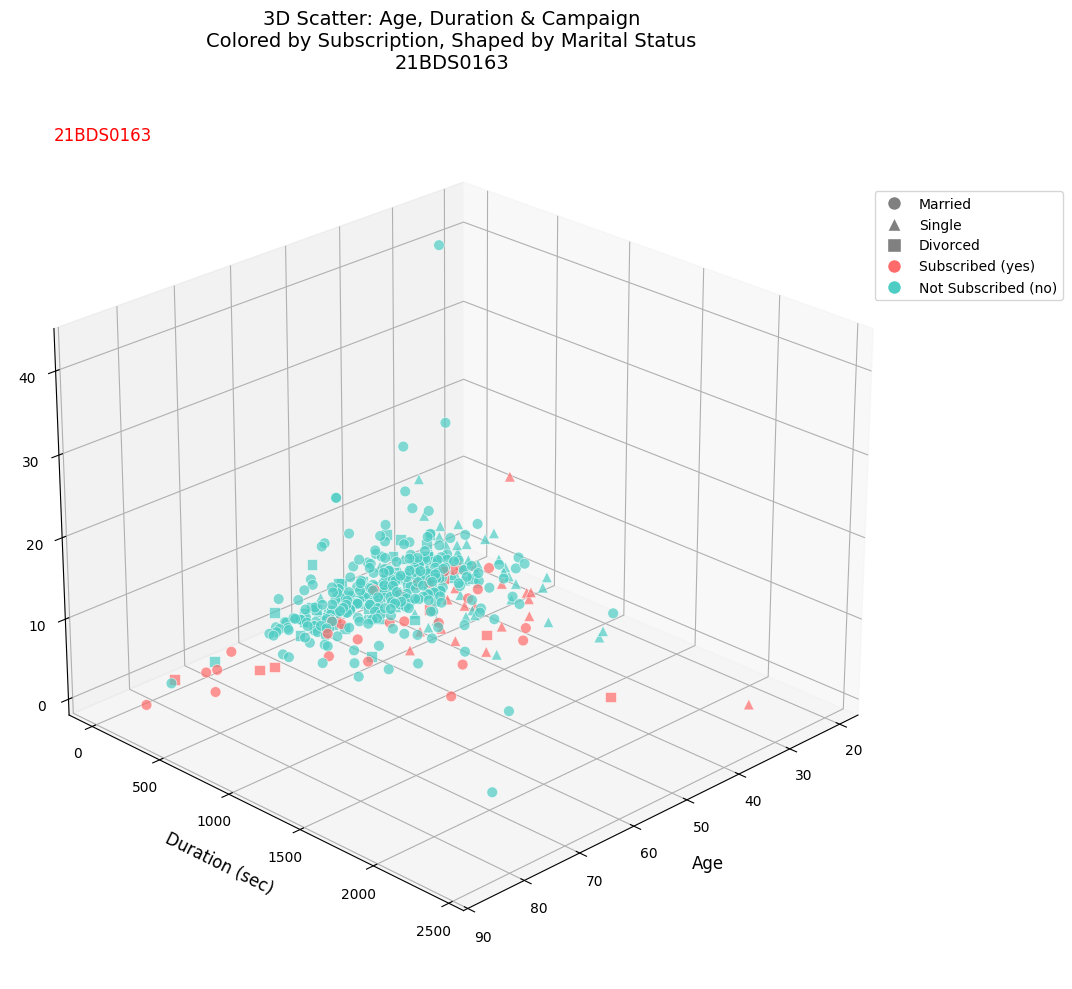

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')

# Sample 500 points for better visualization (optional)
df_sample = df.sample(n=500, random_state=42) if len(df) > 500 else df.copy()

# Create figure
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Custom color mapping based on 'y' (subscription)
colors = {'yes': '#FF6B6B', 'no': '#4ECDC4'}
color_map = [colors[y] for y in df_sample['y']]

# Custom marker shapes based on 'marital' status
markers = {'married': 'o', 'single': '^', 'divorced': 's'}
marker_map = [markers[m] for m in df_sample['marital']]

# Create scatter plot with customizations
for marital, marker in markers.items():
    subset = df_sample[df_sample['marital'] == marital]
    ax.scatter(
        subset['age'],
        subset['duration'],
        subset['campaign'],
        c=[colors[y] for y in subset['y']],
        marker=marker,
        s=60,  # Size of markers
        alpha=0.7,
        edgecolors='w',
        linewidths=0.5,
        label=f'{marital.capitalize()}'
    )

# Add color bars (legend)
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Married',
                      markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='^', color='w', label='Single',
                      markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='s', color='w', label='Divorced',
                      markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Subscribed (yes)',
                      markerfacecolor='#FF6B6B', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Not Subscribed (no)',
                      markerfacecolor='#4ECDC4', markersize=10)
]

# Add title and labels with registration number
ax.set_title('3D Scatter: Age, Duration & Campaign\nColored by Subscription, Shaped by Marital Status\n21BDS0163',
             pad=20, fontsize=14)
ax.set_xlabel('Age', fontsize=12, labelpad=10)
ax.set_ylabel('Duration (sec)', fontsize=12, labelpad=10)
ax.set_zlabel('Campaign Contacts', fontsize=12, labelpad=10)

# Add legend and grid
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 0.9))
ax.grid(True, alpha=0.3)

# Rotate for better view
ax.view_init(elev=25, azim=45)

# Add annotation with registration number
ax.text2D(0.05, 0.95, "21BDS0163", transform=ax.transAxes,
          fontsize=12, color='red')

plt.tight_layout()
plt.show()

9.8 Create a Sunray Plot (Radar Chart)

In [18]:
import plotly.express as px

job_counts = df['job'].value_counts().reset_index()
job_counts.columns = ['job', 'count']

fig = px.line_polar(job_counts, r='count', theta='job',
                   line_close=True,
                   color_discrete_sequence=['#FF6B6B'])
fig.update_layout(title='Job Distribution (Radar Chart) - 21BDS0163')
fig.show()

Module - 5

10. K-Means Clustering

  10.1 Importing Libraries

In [19]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

10.2 Using the Elbow Method to Find the Optimal Number of Clusters

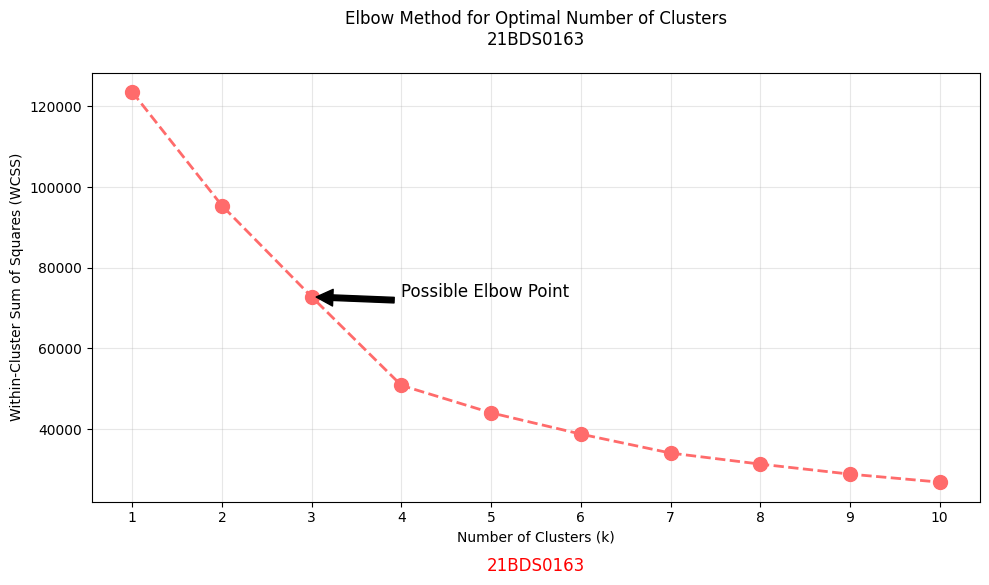


Within-Cluster Sum of Squares (WCSS):
k = 1: 123564.00
k = 2: 95396.01
k = 3: 72799.14
k = 4: 50855.10
k = 5: 44054.95
k = 6: 38777.05
k = 7: 34081.99
k = 8: 31339.87
k = 9: 28857.80
k = 10: 26874.91


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')

# Select numerical features and standardize
X = df[['age', 'duration', 'campaign']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize variables for elbow method
wcss = []  # Within-Cluster-Sum-of-Squares
cluster_range = range(1, 11)  # Testing 1-10 clusters

# Calculate WCSS for different numbers of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--',
         color='#FF6B6B', linewidth=2, markersize=10)
plt.title('Elbow Method for Optimal Number of Clusters\n21BDS0163', pad=20)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(cluster_range)
plt.grid(True, alpha=0.3)

# Highlight the "elbow" point (typically where the curve bends)
elbow_point = 3  # Change this based on your plot
plt.annotate('Possible Elbow Point',
             xy=(elbow_point, wcss[elbow_point-1]),
             xytext=(elbow_point+1, wcss[elbow_point-1]+100),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

# Add registration number
plt.text(0.5, -0.15, "21BDS0163", transform=plt.gca().transAxes,
         ha='center', va='center', fontsize=12, color='red')

plt.tight_layout()
plt.show()

# Print WCSS values for interpretation
print("\nWithin-Cluster Sum of Squares (WCSS):")
for k, w in zip(cluster_range, wcss):
    print(f"k = {k}: {w:.2f}")

10.3 Fit K-Means Clustering

Available columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


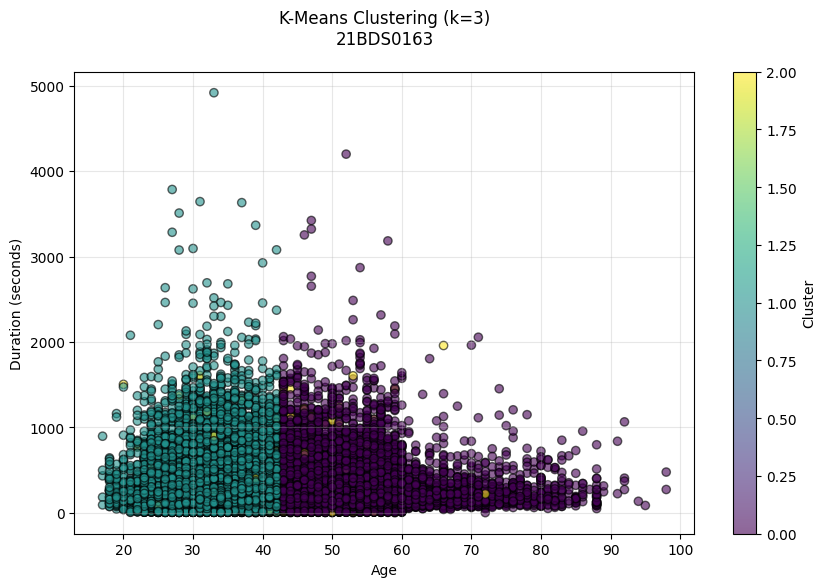

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')

# Verify available columns
print("Available columns:", df.columns.tolist())

# Use existing numerical columns
X = df[['age', 'duration', 'campaign']].dropna()  # Using 'campaign' instead of 'balance'
X_scaled = StandardScaler().fit_transform(X)

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_  # Add cluster labels to original dataframe

# Plot clusters with vibrant colors
plt.figure(figsize=(10,6))
plt.scatter(X['age'], X['duration'], c=df['cluster'],
            cmap='viridis', alpha=0.6, edgecolor='k')
plt.title('K-Means Clustering (k=3)\n21BDS0163', pad=20)
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')
plt.colorbar(label='Cluster')
plt.grid(alpha=0.3)
plt.show()

10.4 Calculate Different Distances

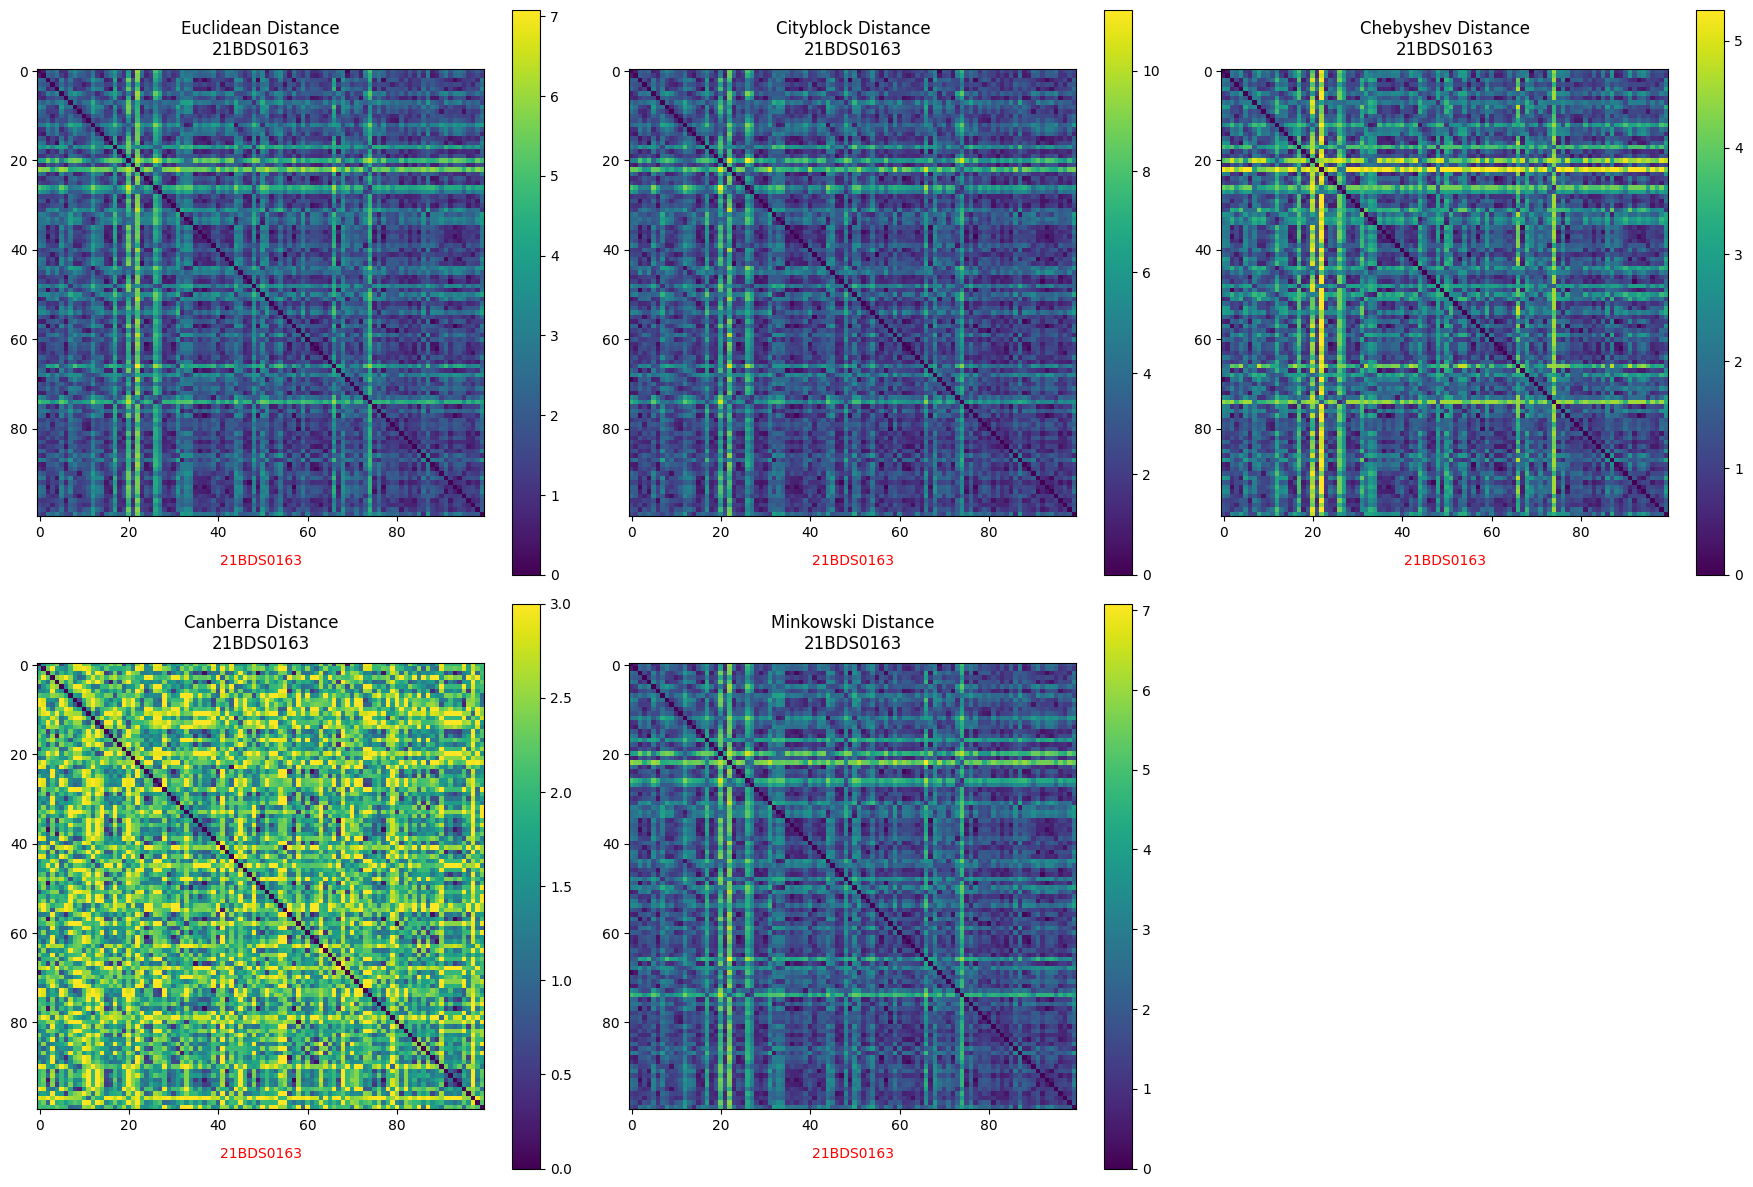

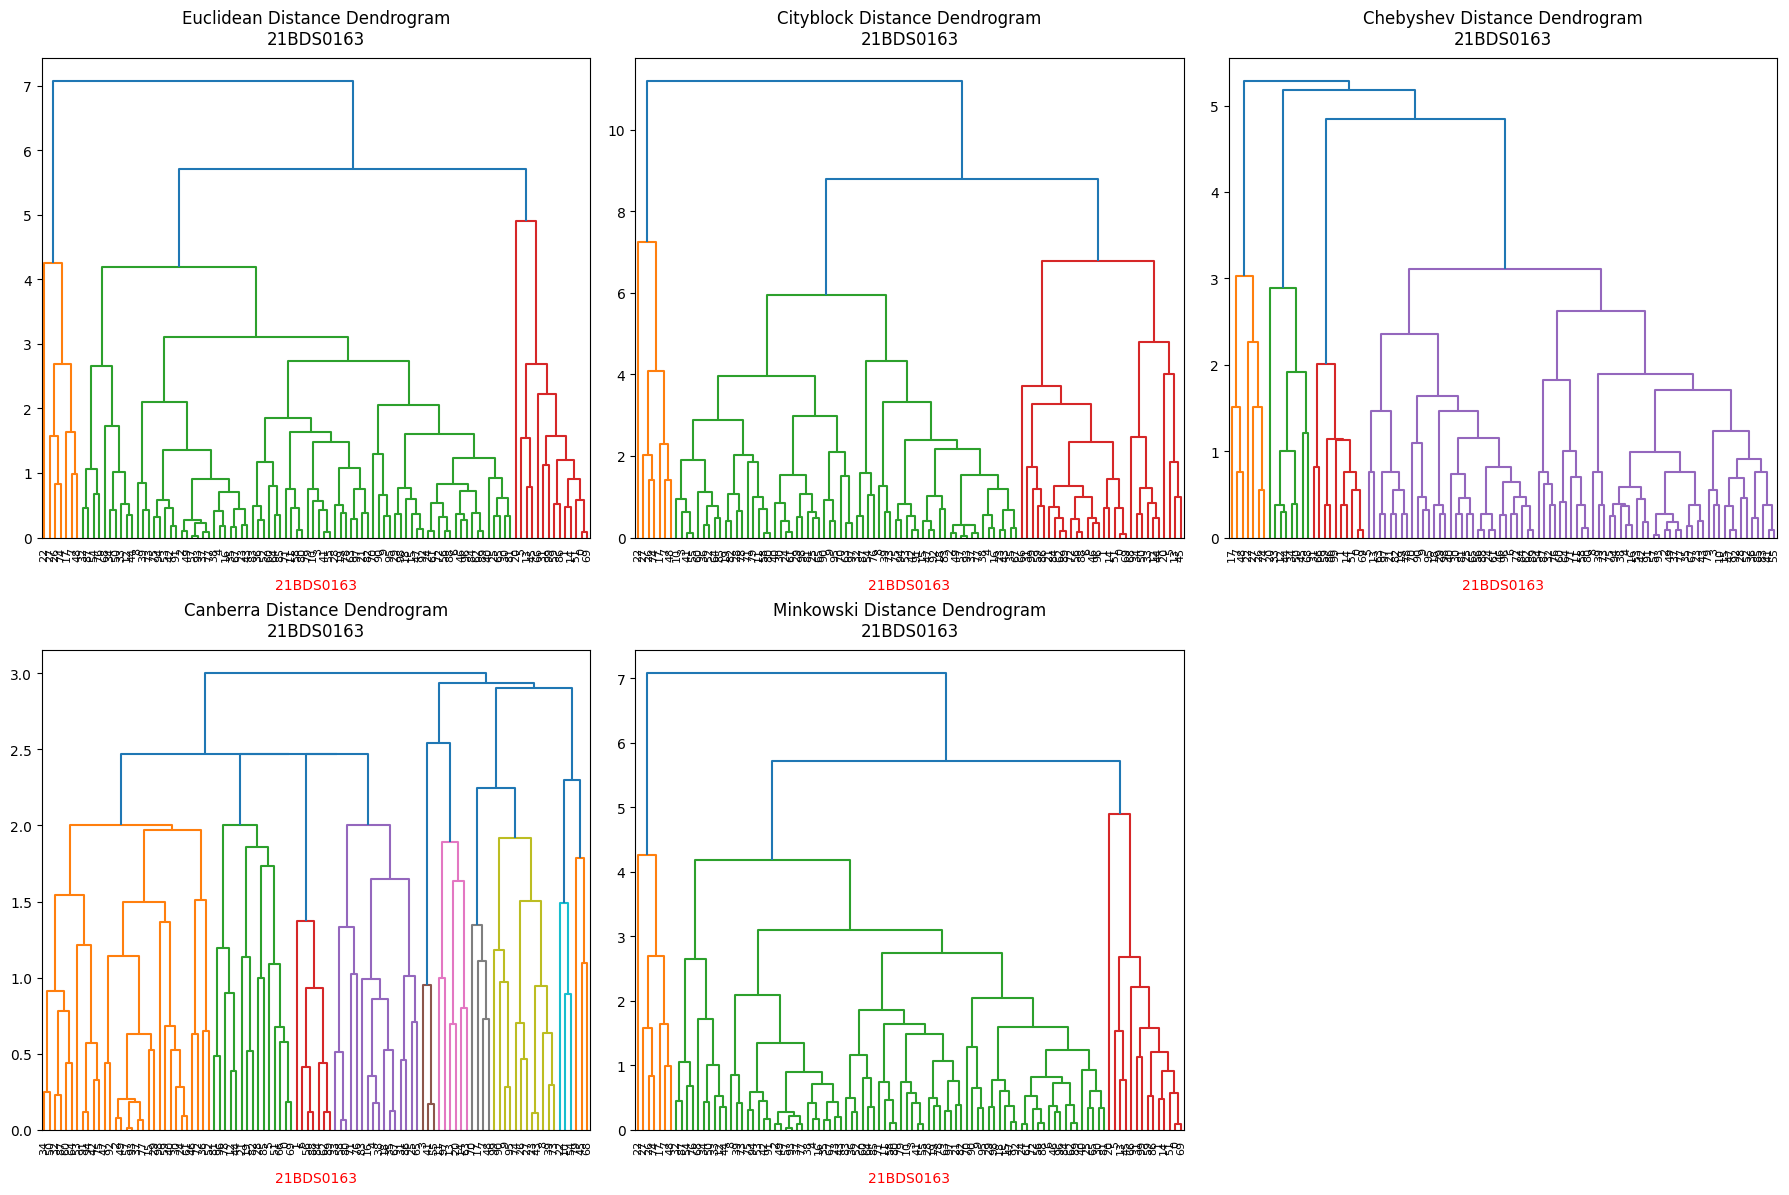


Distance Statistics for First 5 Customers:
Minimum distance: 0.54
Maximum distance: 2.86
Average distance: 1.87


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Load and prepare data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')
X = df[['age', 'duration', 'campaign']].dropna().sample(n=100, random_state=42)  # Sample for clarity
X_scaled = StandardScaler().fit_transform(X)

# Distance metrics to calculate
distance_metrics = ['euclidean', 'cityblock', 'chebyshev', 'canberra', 'minkowski']

# Create figure
plt.figure(figsize=(18, 12))

# Calculate and plot each distance matrix
for i, metric in enumerate(distance_metrics, 1):
    # Calculate distance matrix
    dist_matrix = distance.pdist(X_scaled, metric)
    dist_matrix = distance.squareform(dist_matrix)

    # Plot heatmap
    plt.subplot(2, 3, i)
    plt.imshow(dist_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(f'{metric.capitalize()} Distance\n21BDS0163', pad=10)

    # Add registration number
    plt.text(0.5, -0.1, "21BDS0163", transform=plt.gca().transAxes,
             ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Create dendrograms for each distance metric
plt.figure(figsize=(18, 12))
for i, metric in enumerate(distance_metrics, 1):
    plt.subplot(2, 3, i)
    Z = linkage(X_scaled, method='complete', metric=metric)
    dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
    plt.title(f'{metric.capitalize()} Distance Dendrogram\n21BDS0163', pad=10)

    # Add registration number
    plt.text(0.5, -0.1, "21BDS0163", transform=plt.gca().transAxes,
             ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print distance statistics
print("\nDistance Statistics for First 5 Customers:")
sample_dist = distance.pdist(X_scaled[:5], 'euclidean')
print(f"Minimum distance: {np.min(sample_dist):.2f}")
print(f"Maximum distance: {np.max(sample_dist):.2f}")
print(f"Average distance: {np.mean(sample_dist):.2f}")

11. Hierarchical Clustering

   11.1 Import Libraries and Load Dataset

In [25]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Set style for beautiful visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')



11.2 Statistical Summary

In [27]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

# Load data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')

# Statistical summary for numerical columns
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']
stats_summary = df[numerical_cols].describe().round(2)

# Distance statistics
X = df[numerical_cols].dropna().sample(n=200, random_state=42)
X_scaled = StandardScaler().fit_transform(X)
distances = pdist(X_scaled, 'euclidean')

distance_stats = {
    'Minimum Distance': np.min(distances).round(2),
    'Maximum Distance': np.max(distances).round(2),
    'Mean Distance': np.mean(distances).round(2),
    'Std Distance': np.std(distances).round(2)
}

print("Numerical Features Summary:")
print(stats_summary)
print("\nDistance Statistics:")
print(pd.DataFrame.from_dict(distance_stats, orient='index', columns=['Value']))

Numerical Features Summary:
            age  duration  campaign     pdays  previous
count  41188.00  41188.00  41188.00  41188.00  41188.00
mean      40.02    258.29      2.57    962.48      0.17
std       10.42    259.28      2.77    186.91      0.49
min       17.00      0.00      1.00      0.00      0.00
25%       32.00    102.00      1.00    999.00      0.00
50%       38.00    180.00      2.00    999.00      0.00
75%       47.00    319.00      3.00    999.00      0.00
max       98.00   4918.00     56.00    999.00      7.00

Distance Statistics:
                  Value
Minimum Distance   0.00
Maximum Distance  14.17
Mean Distance      2.51
Std Distance       1.94


11.3 Euclidean Distance Matrix and Dendrogram

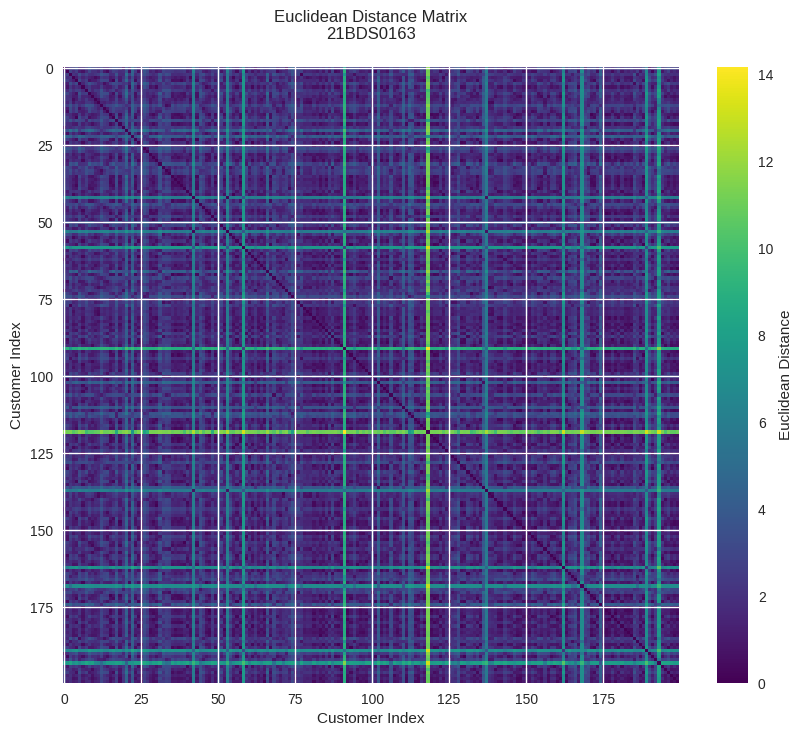

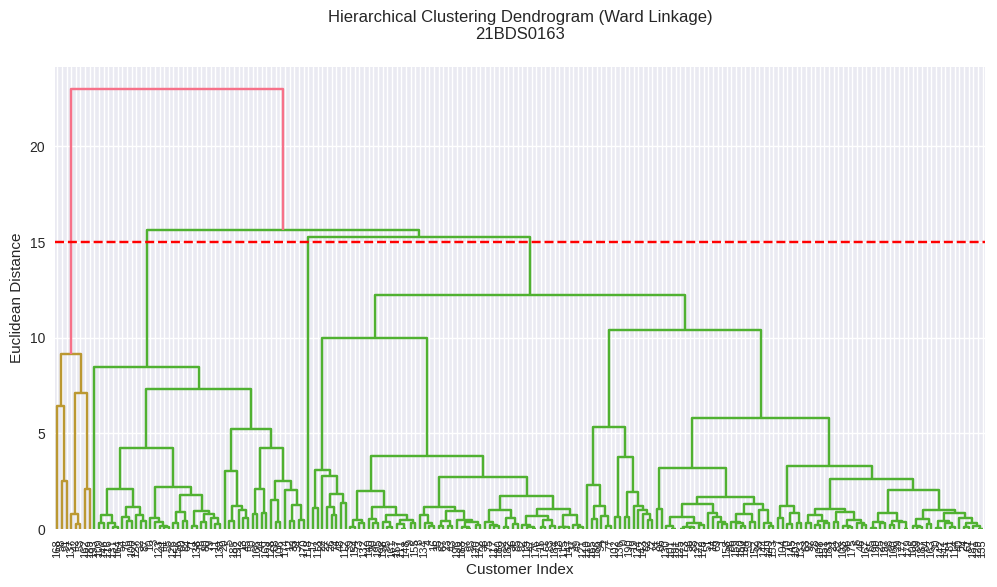

Euclidean Distance Statistics:
Min distance: 0.00
Max distance: 14.17
Mean distance: 2.50


In [28]:
euclidean_dist = squareform(pdist(X_scaled, 'euclidean'))

plt.figure(figsize=(10, 8))
plt.imshow(euclidean_dist, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Euclidean Distance')
plt.title('Euclidean Distance Matrix\n21BDS0163', pad=20)
plt.xlabel('Customer Index')
plt.ylabel('Customer Index')
plt.show()

# 2. Dendrogram using Euclidean Distance
plt.figure(figsize=(12, 6))
Z = linkage(X_scaled, method='ward', metric='euclidean')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)\n21BDS0163', pad=20)
plt.xlabel('Customer Index')
plt.ylabel('Euclidean Distance')
plt.axhline(y=15, color='r', linestyle='--')  # Suggested cutoff line
plt.show()

# Print distance statistics
print("Euclidean Distance Statistics:")
print(f"Min distance: {np.min(euclidean_dist):.2f}")
print(f"Max distance: {np.max(euclidean_dist):.2f}")
print(f"Mean distance: {np.mean(euclidean_dist):.2f}")



11.4 Manhattan Distance Matrix and Dendrogram

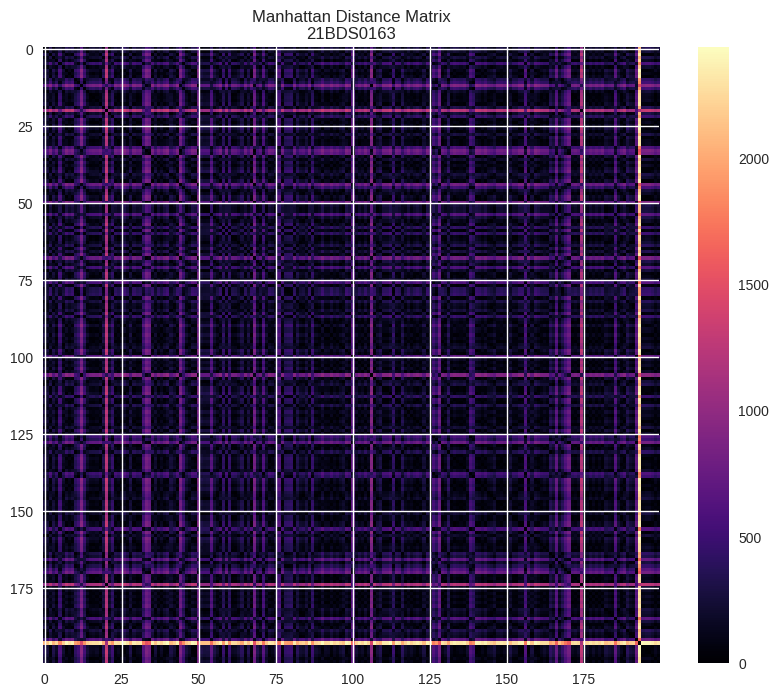

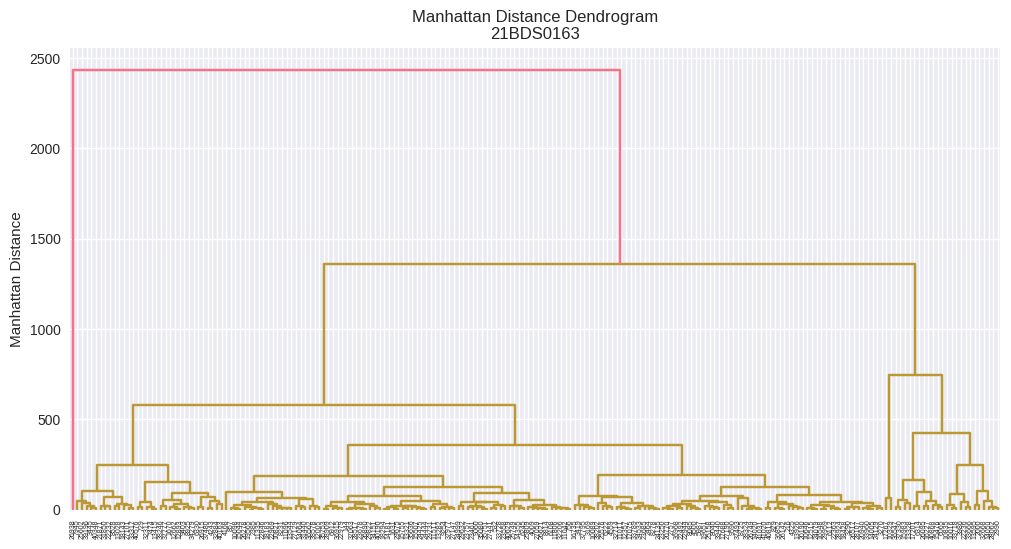

In [29]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load and prepare data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')
X = df[['age', 'duration', 'campaign']].dropna().sample(200, random_state=42)

# Manhattan Distance Matrix
manhattan_dist = squareform(pdist(X, 'cityblock'))
plt.figure(figsize=(10,8))
plt.imshow(manhattan_dist, cmap='magma')
plt.title('Manhattan Distance Matrix\n21BDS0163')
plt.colorbar()
plt.show()

# Manhattan Dendrogram
plt.figure(figsize=(12,6))
dendrogram(linkage(X, method='complete', metric='cityblock'),
           labels=X.index, leaf_rotation=90)
plt.title('Manhattan Distance Dendrogram\n21BDS0163')
plt.ylabel('Manhattan Distance')
plt.show()

11.5 Maximum Distance Matrix and Dendrogram

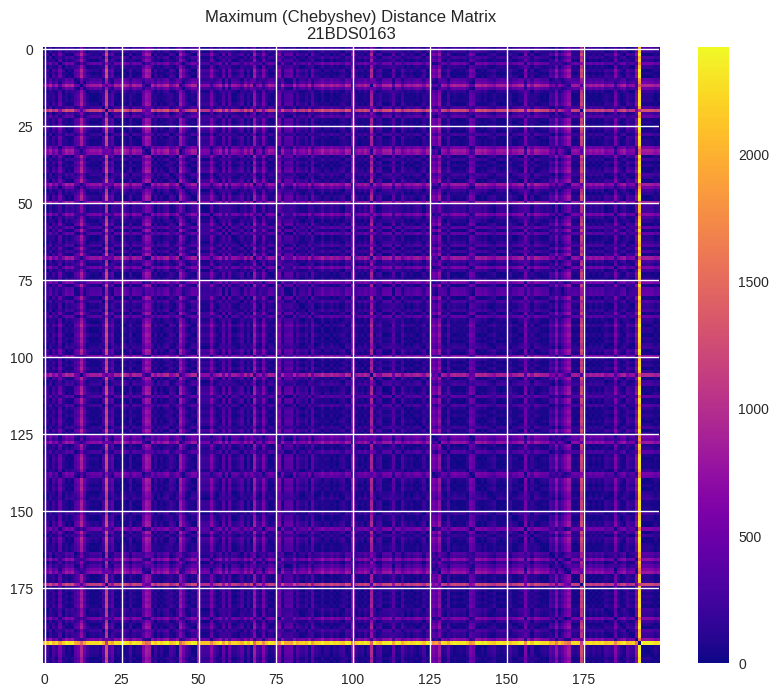

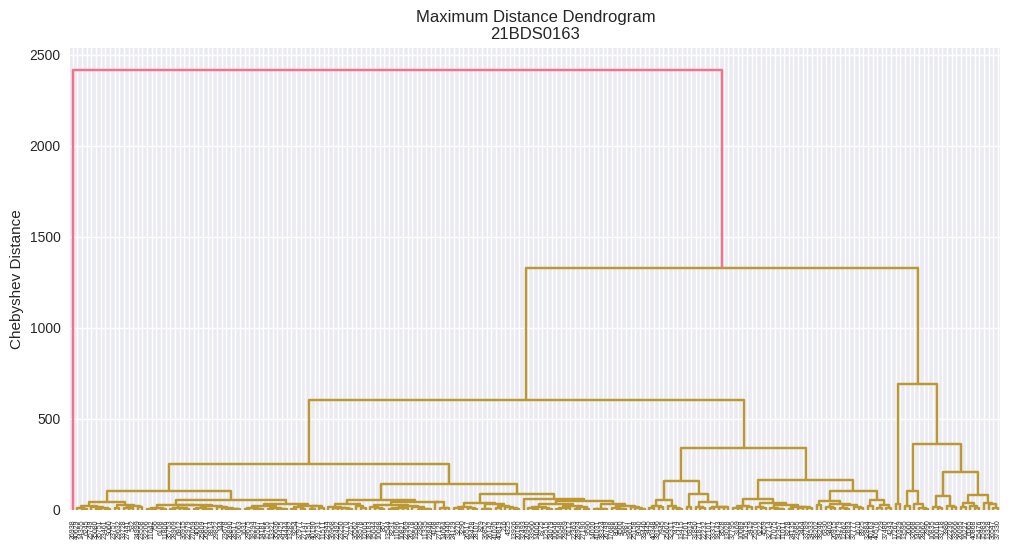

In [30]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load and prepare data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')
X = df[['age', 'duration', 'campaign']].dropna().sample(200, random_state=42)

# Chebyshev (Maximum) Distance Matrix
max_dist = squareform(pdist(X, 'chebyshev'))
plt.figure(figsize=(10,8))
plt.imshow(max_dist, cmap='plasma')
plt.title('Maximum (Chebyshev) Distance Matrix\n21BDS0163')
plt.colorbar()
plt.show()

# Maximum Distance Dendrogram
plt.figure(figsize=(12,6))
dendrogram(linkage(X, method='complete', metric='chebyshev'),
           labels=X.index, leaf_rotation=90)
plt.title('Maximum Distance Dendrogram\n21BDS0163')
plt.ylabel('Chebyshev Distance')
plt.show()

11.6 Canberra Distance Matrix and Dendrogram

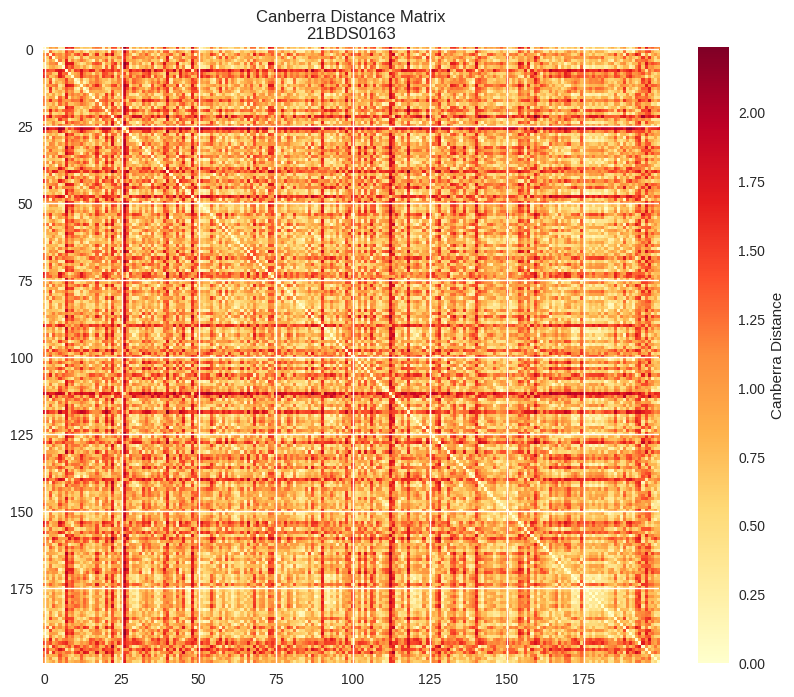

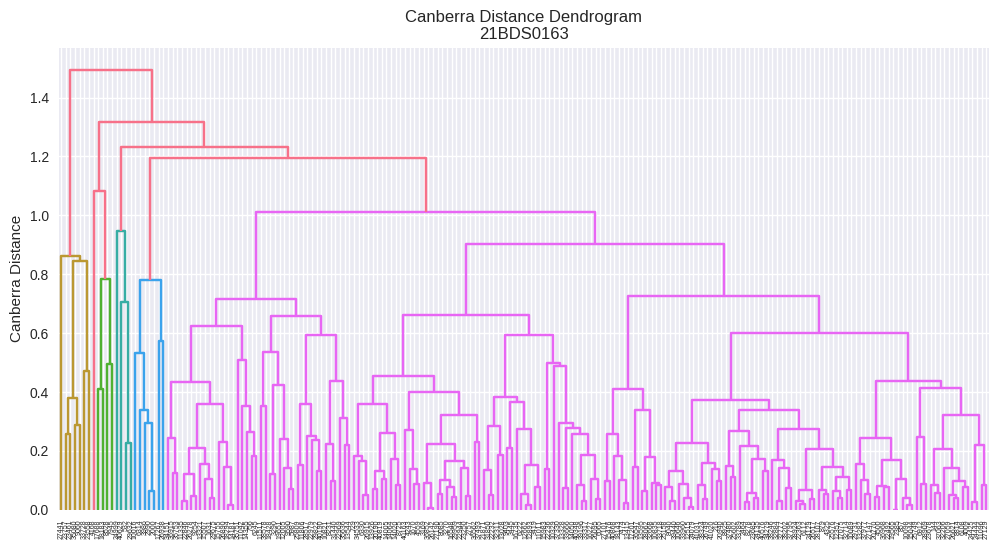

In [31]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load and prepare data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')
X = df[['age', 'duration', 'campaign']].dropna().sample(200, random_state=42)

# Canberra Distance Matrix
canberra_dist = squareform(pdist(X, 'canberra'))
plt.figure(figsize=(10,8))
plt.imshow(canberra_dist, cmap='YlOrRd')
plt.title('Canberra Distance Matrix\n21BDS0163')
plt.colorbar(label='Canberra Distance')
plt.show()

# Canberra Dendrogram
plt.figure(figsize=(12,6))
dendrogram(linkage(X, method='average', metric='canberra'),
           labels=X.index, leaf_rotation=90)
plt.title('Canberra Distance Dendrogram\n21BDS0163')
plt.ylabel('Canberra Distance')
plt.show()

11.7 Minkowski Distance Matrix and Dendrogram

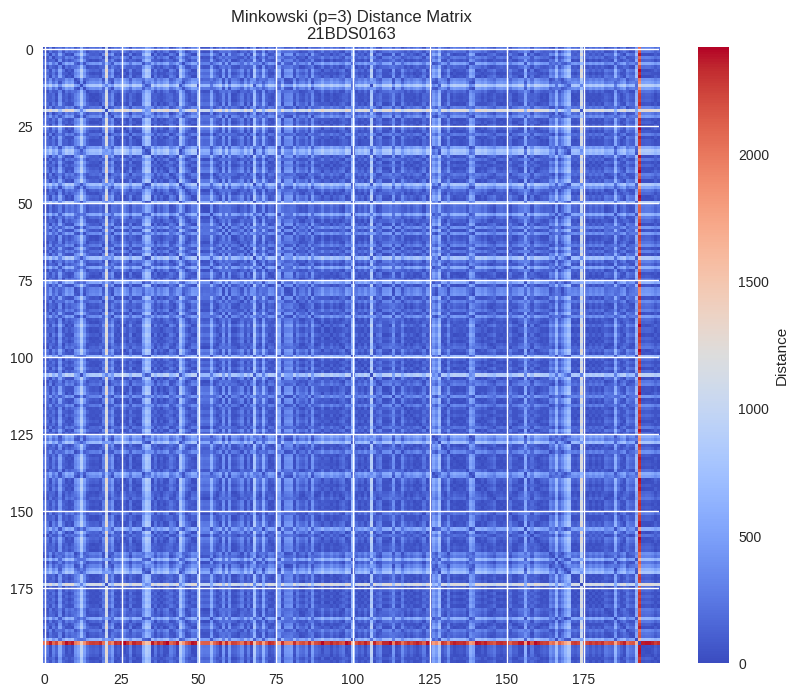

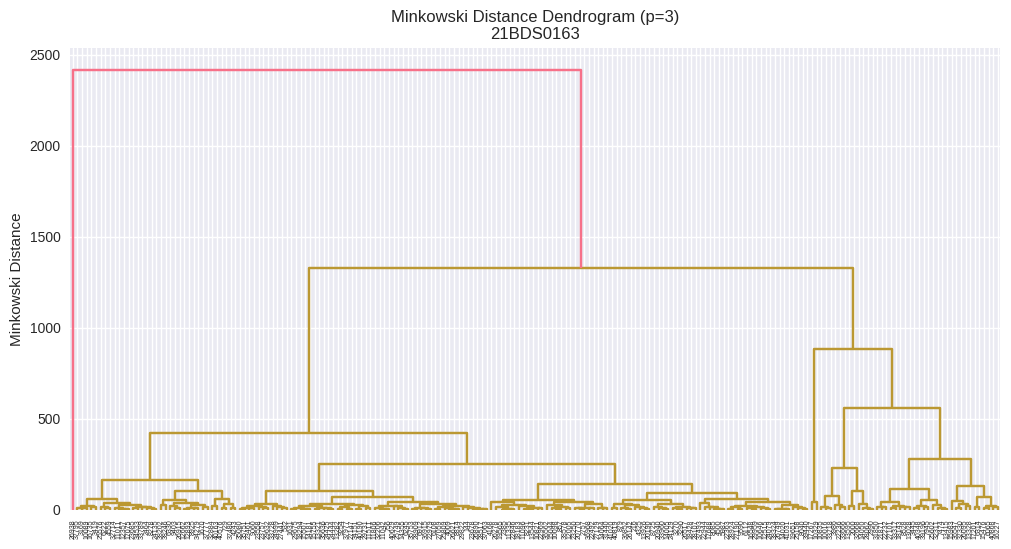

In [33]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load and prepare data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')
X = df[['age', 'duration', 'campaign']].dropna().sample(200, random_state=42)

# Calculate Minkowski distances (p=3)
dist_matrix = pdist(X, 'minkowski', p=3)

# Minkowski Distance Matrix
plt.figure(figsize=(10,8))
plt.imshow(squareform(dist_matrix), cmap='coolwarm')
plt.title('Minkowski (p=3) Distance Matrix\n21BDS0163')
plt.colorbar(label='Distance')
plt.show()

# Minkowski Dendrogram
plt.figure(figsize=(12,6))
dendrogram(linkage(dist_matrix, method='complete'),  # Use precomputed distances
           labels=X.index, leaf_rotation=90)
plt.title('Minkowski Distance Dendrogram (p=3)\n21BDS0163')
plt.ylabel('Minkowski Distance')
plt.show()

Module - 6

Principle Compenent Analysis

Step 1: Install and load necessary libraries

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Step 2: Load the Dataset

In [35]:
# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv'
df = pd.read_csv(url)

# View the first few rows of the dataset
df.head()

age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0  56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
1  57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
2  37;"services";"married";"high.school";"no";"ye...                                                                                                                                                                          
3  40;"admin.";"married";"basic.6y";"no";"no";"no...                                                                                                                                                                          
4  56;"services";"married";"high.school";"no";"no...

Step 3: Perform PCA on Numeric Columns

PCA Results:
   Component  Eigenvalues  Variance Explained  Cumulative Variance
0          1       3.8956              0.3895               0.3895
1          2       1.3589              0.1359               0.5254
2          3       1.0777              0.1078               0.6332
3          4       1.0504              0.1050               0.7382
4          5       0.9295              0.0929               0.8312
5          6       0.8419              0.0842               0.9154
6          7       0.4251              0.0425               0.9579
7          8       0.3857              0.0386               0.9965
8          9       0.0249              0.0025               0.9989
9         10       0.0106              0.0011               1.0000


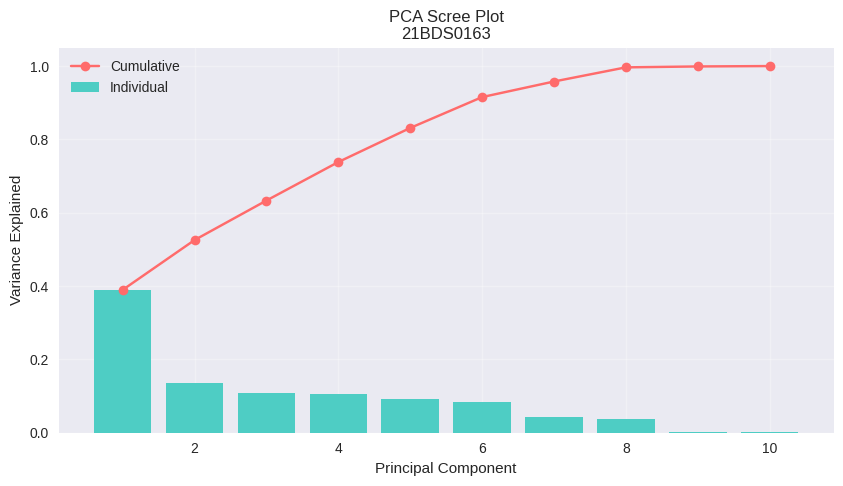

In [36]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')

# Select numeric columns and standardize
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
X = df[numeric_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create PCA results dataframe
pca_results = pd.DataFrame({
    'Component': range(1, len(numeric_cols)+1),
    'Eigenvalues': pca.explained_variance_,
    'Variance Explained': pca.explained_variance_ratio_,
    'Cumulative Variance': pca.explained_variance_ratio_.cumsum()
})

print("PCA Results:")
print(pca_results.round(4))

# Scree Plot
plt.figure(figsize=(10,5))
plt.bar(pca_results['Component'], pca_results['Variance Explained'], color='#4ECDC4')
plt.plot(pca_results['Component'], pca_results['Cumulative Variance'], 'o-', color='#FF6B6B')
plt.title('PCA Scree Plot\n21BDS0163')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend(['Cumulative', 'Individual'])
plt.grid(alpha=0.3)
plt.show()

Step 4: Print PCA Results (Eigenvalues and Component Loadings)

In [37]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')

# Select numeric columns and standardize
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
X = df[numeric_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 1. Print Eigenvalues (Explained Variance Ratio)
print("="*60)
print("PCA RESULTS - EXPLAINED VARIANCE (EIGENVALUES)".center(60))
print("="*60)
print(pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(numeric_cols))],
    'Eigenvalue': pca.explained_variance_,
    'Variance Explained': pca.explained_variance_ratio_,
    'Cumulative Variance': pca.explained_variance_ratio_.cumsum()
}).round(4))

# 2. Print Component Loadings
print("\n" + "="*60)
print("PCA COMPONENT LOADINGS (FEATURE WEIGHTS)".center(60))
print("="*60)
loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(numeric_cols))],
    index=numeric_cols
)
print(loadings_df.round(4))

# Interpretation Guide
print("\n" + "="*60)
print("HOW TO INTERPRET THESE RESULTS:".center(60))
print("="*60)
print("1. Eigenvalues show variance captured by each component")
print("2. Loadings > |0.5| indicate strong feature-component relationships")
print("3. Cumulative variance helps determine how many components to retain")
print("4. PC1 is the direction of maximum variance in the data")

       PCA RESULTS - EXPLAINED VARIANCE (EIGENVALUES)       
  Component  Eigenvalue  Variance Explained  Cumulative Variance
0       PC1      3.8956              0.3895               0.3895
1       PC2      1.3589              0.1359               0.5254
2       PC3      1.0777              0.1078               0.6332
3       PC4      1.0504              0.1050               0.7382
4       PC5      0.9295              0.0929               0.8312
5       PC6      0.8419              0.0842               0.9154
6       PC7      0.4251              0.0425               0.9579
7       PC8      0.3857              0.0386               0.9965
8       PC9      0.0249              0.0025               0.9989
9      PC10      0.0106              0.0011               1.0000

          PCA COMPONENT LOADINGS (FEATURE WEIGHTS)          
                   PC1     PC2     PC3     PC4     PC5     PC6     PC7  \
age            -0.0016 -0.2519  0.6353 -0.2534  0.4450 -0.5191 -0.0313   
duration      

Step 5: Visualize PCA Components Using plot() and biplot()

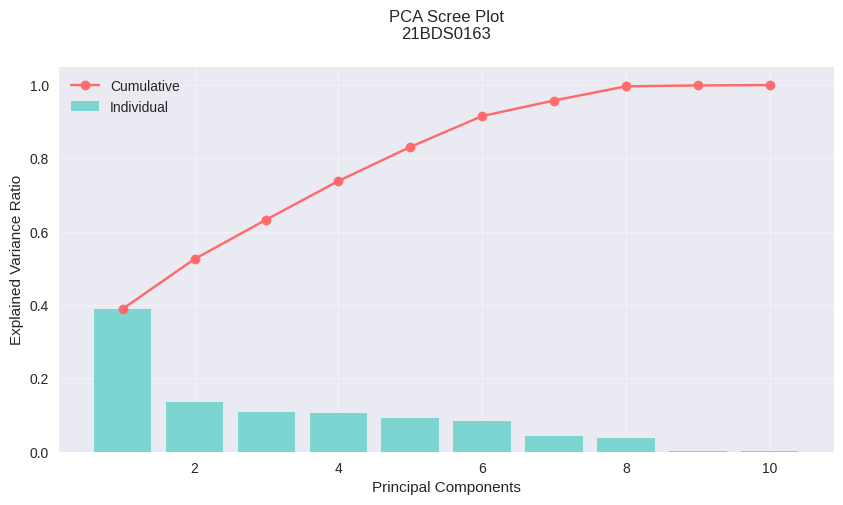

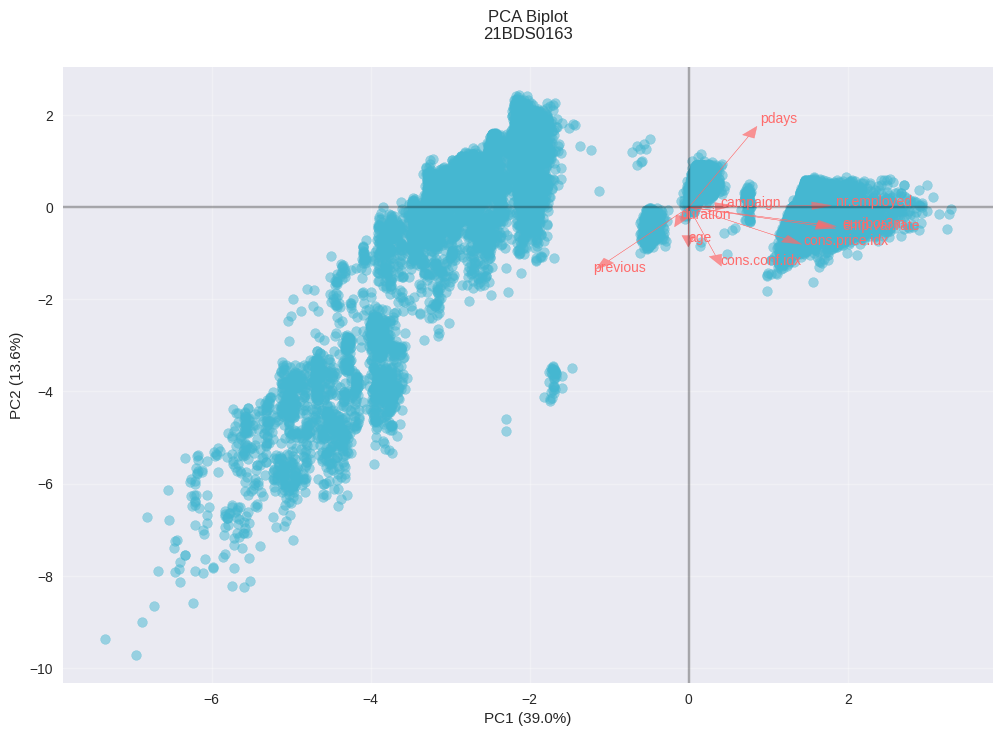

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load and prepare data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
X = df[numeric_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 1. Scree Plot
plt.figure(figsize=(10,5))
plt.bar(range(1, len(numeric_cols)+1), pca.explained_variance_ratio_, color='#4ECDC4', alpha=0.7, label='Individual')
plt.plot(range(1, len(numeric_cols)+1), pca.explained_variance_ratio_.cumsum(), 'o-', color='#FF6B6B', label='Cumulative')
plt.title('PCA Scree Plot\n21BDS0163', pad=20)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 2. Biplot Function
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(12,8))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    # Plot scores
    plt.scatter(xs, ys, c='#45B7D1', alpha=0.5)

    # Plot arrows
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*max(xs), coeff[i,1]*max(ys),
                 color='#FF6B6B', alpha=0.7, head_width=0.05*max(xs))
        if labels is None:
            plt.text(coeff[i,0]*max(xs)*1.2, coeff[i,1]*max(ys)*1.2,
                     f"Var{i+1}", color='#FF6B6B')
        else:
            plt.text(coeff[i,0]*max(xs)*1.2, coeff[i,1]*max(ys)*1.2,
                     labels[i], color='#FF6B6B')

    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    plt.title('PCA Biplot\n21BDS0163', pad=20)
    plt.grid(alpha=0.3)
    plt.axhline(y=0, color='k', alpha=0.3)
    plt.axvline(x=0, color='k', alpha=0.3)

# Create biplot
biplot(X_pca[:,0:2], np.transpose(pca.components_[0:2, :]), labels=numeric_cols)
plt.show()

Step 6: Create a Scree Plot to Determine the Optimal Number of Principal Components

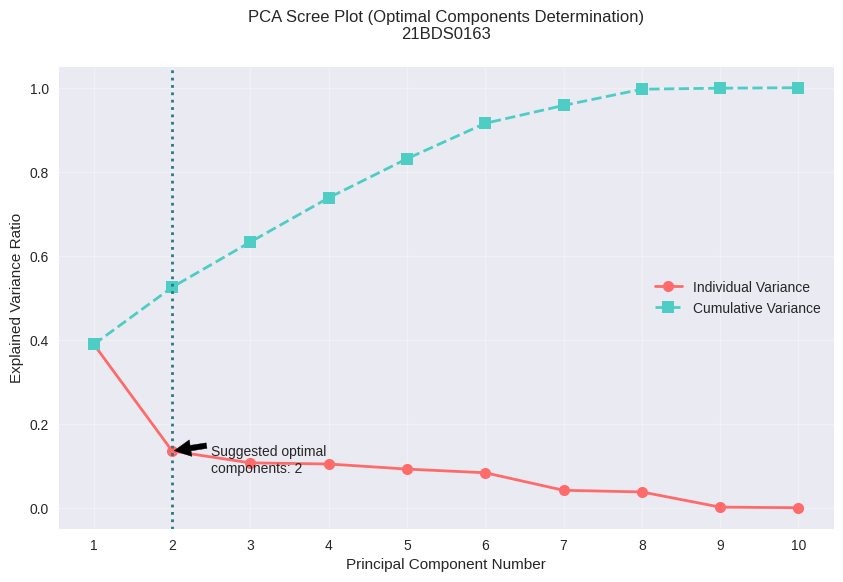

Variance Explained by Each Component:
PC1: 39.0%
PC2: 13.6%
PC3: 10.8%
PC4: 10.5%
PC5: 9.3%
PC6: 8.4%
PC7: 4.3%
PC8: 3.9%
PC9: 0.2%
PC10: 0.1%


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load and prepare data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
X = df[numeric_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Create Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(numeric_cols)+1), pca.explained_variance_ratio_, 'o-',
         color='#FF6B6B', linewidth=2, markersize=8, label='Individual Variance')
plt.plot(range(1, len(numeric_cols)+1), pca.explained_variance_ratio_.cumsum(), 's--',
         color='#4ECDC4', linewidth=2, markersize=8, label='Cumulative Variance')

# Highlight elbow point (typically where the curve bends)
elbow_point = 2  # Adjust based on your plot
plt.axvline(x=elbow_point, color='#2A7886', linestyle=':', linewidth=2)

# Formatting
plt.title('PCA Scree Plot (Optimal Components Determination)\n21BDS0163', pad=20)
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(numeric_cols)+1))
plt.grid(alpha=0.3)
plt.legend()

# Add interpretation annotations
plt.annotate(f'Suggested optimal\ncomponents: {elbow_point}',
             xy=(elbow_point, pca.explained_variance_ratio_[elbow_point-1]),
             xytext=(elbow_point+0.5, pca.explained_variance_ratio_[elbow_point-1]-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.show()

# Print variance explained
print("Variance Explained by Each Component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var*100:.1f}%")

Step 7: Select the Desired Number of Components (n_comp)

In [40]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load and prepare data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
X = df[numeric_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)

# Determine optimal components (using elbow method)
pca_full = PCA()
pca_full.fit(X_scaled)

# Rule: Keep components that explain ≥80% cumulative variance OR eigenvalues >1
n_comp = len([x for x in pca_full.explained_variance_ratio_.cumsum() if x < 0.8]) + 1

print("="*60)
print(f"SELECTED NUMBER OF PRINCIPAL COMPONENTS: {n_comp}".center(60))
print("="*60)
print(f"Variance explained by first {n_comp} components: {pca_full.explained_variance_ratio_[:n_comp].sum()*100:.1f}%")

# Perform PCA with selected components
pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(X_scaled)

print("\nComponent-Wise Variance Explained:")
for i in range(n_comp):
    print(f"PC{i+1}: {pca.explained_variance_ratio_[i]*100:.1f}%")

print("\n21BDS0163 - Optimal components selected based on scree plot analysis")

         SELECTED NUMBER OF PRINCIPAL COMPONENTS: 5         
Variance explained by first 5 components: 83.1%

Component-Wise Variance Explained:
PC1: 39.0%
PC2: 13.6%
PC3: 10.8%
PC4: 10.5%
PC5: 9.3%

21BDS0163 - Optimal components selected based on scree plot analysis


Step 8: Perform PCA with the Selected Components

In [41]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load and prepare data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
X = df[numeric_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)

# Set number of components (from Step 7)
n_comp = 3  # Replace with your selected number from scree plot analysis

# Perform PCA with selected components
pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(X_scaled)

# Create results DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_comp)])
pca_df = pd.concat([df[['age', 'job', 'marital']].reset_index(drop=True),
                   pca_df], axis=1).dropna()

# Print results
print("="*60)
print(f"PCA TRANSFORMATION RESULTS (n_components={n_comp})".center(60))
print("="*60)
print(f"Total variance explained: {pca.explained_variance_ratio_.sum()*100:.1f}%")
print("\nFirst 5 transformed samples:")
print(pca_df.head())
print("\n21BDS0163 - PCA performed with selected components")

        PCA TRANSFORMATION RESULTS (n_components=3)         
Total variance explained: 63.3%

First 5 transformed samples:
   age        job  marital       PC1       PC2       PC3
0   56  housemaid  married  1.267980 -0.890315  1.488015
1   57   services  married  1.278872 -0.879321  1.531299
2   37   services  married  1.274307 -0.420055  0.324230
3   40     admin.  married  1.281248 -0.469023  0.495276
4   56   services  married  1.263445 -0.904758  1.495275

21BDS0163 - PCA performed with selected components


Step 9: Plot the Selected PCA Components

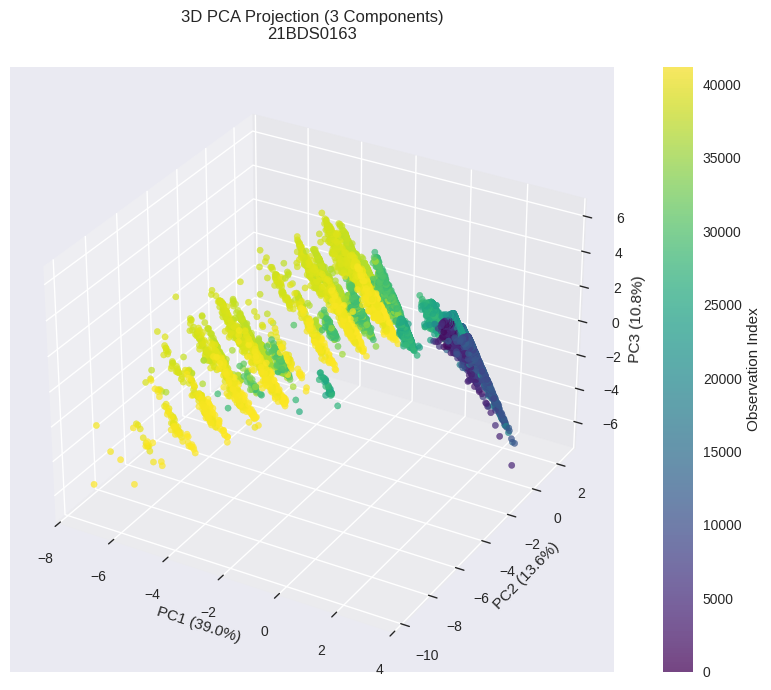

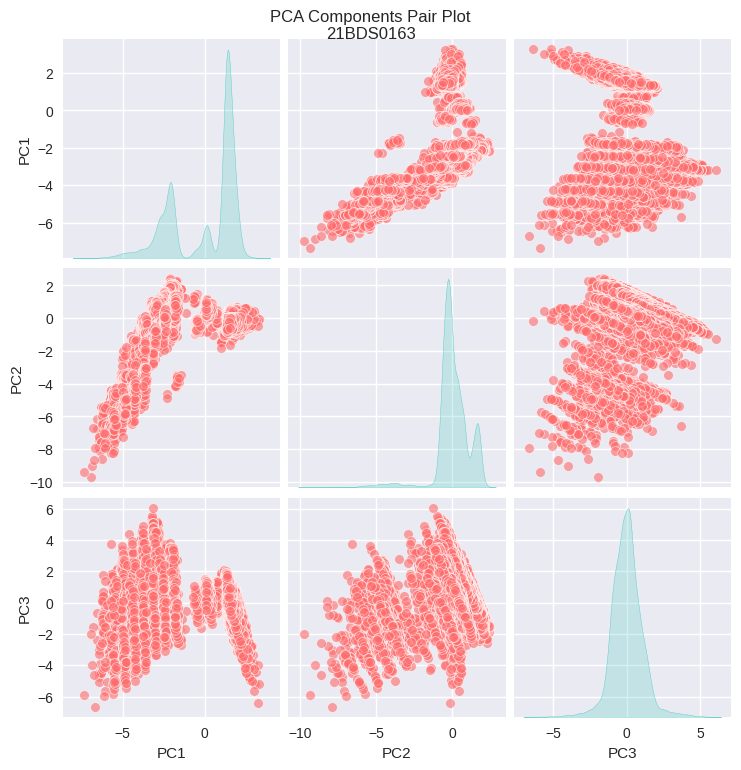

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plot if n_comp=3

# Set style
plt.style.use('seaborn-v0_8')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Red, Teal, Blue

# Plot based on number of components
if n_comp == 2:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'],
                         c=pca_df.index, cmap='viridis', alpha=0.7)
    plt.title(f'2D PCA Projection ({n_comp} Components)\n21BDS0163', pad=20)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
    plt.colorbar(scatter, label='Observation Index')

elif n_comp >= 3:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                        c=pca_df.index, cmap='viridis', alpha=0.7)
    ax.set_title(f'3D PCA Projection ({n_comp} Components)\n21BDS0163', pad=20)
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
    ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)')
    fig.colorbar(scatter, ax=ax, label='Observation Index')

# Add enhancements
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Pair plot for multi-component visualization
if n_comp > 1:
    import seaborn as sns
    g = sns.pairplot(pca_df.iloc[:, -n_comp:],
                    diag_kind='kde',
                    plot_kws={'alpha': 0.6, 'color': '#FF6B6B'},
                    diag_kws={'color': '#4ECDC4'})
    g.fig.suptitle(f'PCA Components Pair Plot\n21BDS0163', y=1.02)
    plt.show()

Step 10: Interpret the Results Using summary()

In [43]:
# Generate interpretation report
def pca_summary(pca, features, n_comp):
    print("="*80)
    print(f"PCA ANALYSIS SUMMARY (n_components={n_comp})".center(80))
    print("="*80)

    # Variance explanation
    print("\nVARIANCE EXPLANATION:")
    print(f"Total variance captured: {pca.explained_variance_ratio_.sum()*100:.1f}%")
    for i in range(n_comp):
        print(f"PC{i+1}: {pca.explained_variance_ratio_[i]*100:.1f}%")

    # Component loadings
    print("\nKEY FEATURE LOADINGS (Absolute values > 0.5):")
    loadings = pd.DataFrame(pca.components_.T,
                          columns=[f'PC{i+1}' for i in range(n_comp)],
                          index=features)

    significant_loadings = loadings[abs(loadings) > 0.5].stack().dropna()
    if not significant_loadings.empty:
        print(significant_loadings.to_string())
    else:
        print("No strong loadings found (all < |0.5|)")

    # Interpretation guide
    print("\nINTERPRETATION GUIDE:")
    print("1. PC1 represents the direction of maximum variance")
    print("2. Features with high absolute loadings (>0.5) strongly influence each PC")
    print("3. Similar loading signs indicate positive correlation between features")
    print("4. Opposite loading signs indicate negative correlation")
    print("\n21BDS0163 - PCA Interpretation Summary")

# Generate summary
pca_summary(pca, numeric_cols, n_comp)

                     PCA ANALYSIS SUMMARY (n_components=3)                      

VARIANCE EXPLANATION:
Total variance captured: 63.3%
PC1: 39.0%
PC2: 13.6%
PC3: 10.8%

KEY FEATURE LOADINGS (Absolute values > 0.5):
age            PC3    0.635283
pdays          PC2    0.628712
cons.conf.idx  PC3    0.510937

INTERPRETATION GUIDE:
1. PC1 represents the direction of maximum variance
2. Features with high absolute loadings (>0.5) strongly influence each PC
3. Similar loading signs indicate positive correlation between features
4. Opposite loading signs indicate negative correlation

21BDS0163 - PCA Interpretation Summary


Module - 7

Step 1: Load Dataset

In [44]:
# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url)

Step 2: Data Cleaning and Preprocessing

In [45]:
df.fillna(df.median(numeric_only=True), inplace=True)  # Numeric columns
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Categorical columns

if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

<ipython-input-45-a1923b469cd0>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Step 3: Identify Relationships Between Features

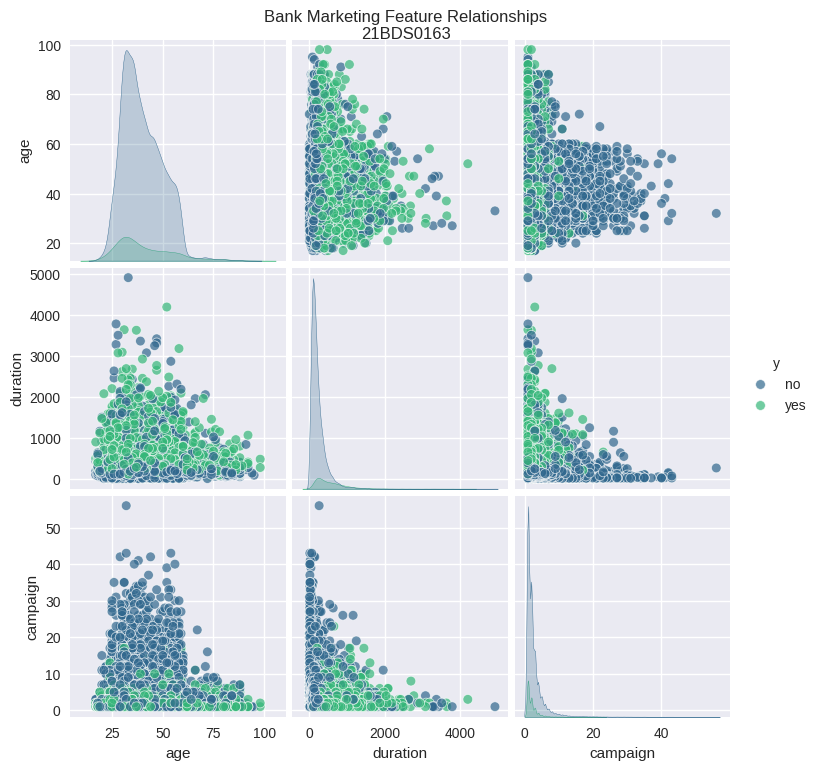

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv"
df = pd.read_csv(url, sep=';')

# Simple pair plot
sns.pairplot(df[['age', 'duration', 'campaign', 'y']],
             hue='y',
             palette='viridis',
             plot_kws={'alpha': 0.7})
plt.suptitle('Bank Marketing Feature Relationships\n21BDS0163', y=1.02)
plt.show()

Step 4: Split the Dataset into Training and Test Sets

In [47]:
from sklearn.model_selection import train_test_split

# Prepare features (X) and target (y)
X = df.drop('y', axis=1)  # Features (all columns except target)
y = df['y']  # Target variable

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Split into 70% training and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\n21BDS0163 - Dataset split completed")

Training set shape: (28831, 63)
Test set shape: (12357, 63)

Class distribution in y_train:
y
no     0.887343
yes    0.112657
Name: proportion, dtype: float64

21BDS0163 - Dataset split completed


Step 5: Simple Linear Regression

   5.1 Fit the Model and check residuals :

In [51]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert target to numeric (1 for 'yes', 0 for 'no')
y_train_numeric = np.where(y_train == 'yes', 1, 0)

# Fit model
model = LinearRegression()
model.fit(X_train[['age']], y_train_numeric)  # Using 'age' as predictor

# Print coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")
print("21BDS0163 - Model fitted")

Intercept: 0.08
Coefficient: 0.00
21BDS0163 - Model fitted


5.3 Predict Test Results:

In [53]:
# Convert test target to numeric (1 for 'yes', 0 for 'no')
y_test_numeric = np.where(y_test == 'yes', 1, 0)

# Make predictions
y_pred = model.predict(X_test[['age']])

# Print first 5 predictions vs actual
print("Test Predictions vs Actual:")
for i in range(5):
    print(f"Predicted: {y_pred[i]:.2f} | Actual: {y_test_numeric[i]}")

print("\n21BDS0163 - Predictions completed")

Test Predictions vs Actual:
Predicted: 0.12 | Actual: 0
Predicted: 0.13 | Actual: 0
Predicted: 0.11 | Actual: 0
Predicted: 0.11 | Actual: 0
Predicted: 0.10 | Actual: 1

21BDS0163 - Predictions completed


5.4 Visualize Results:

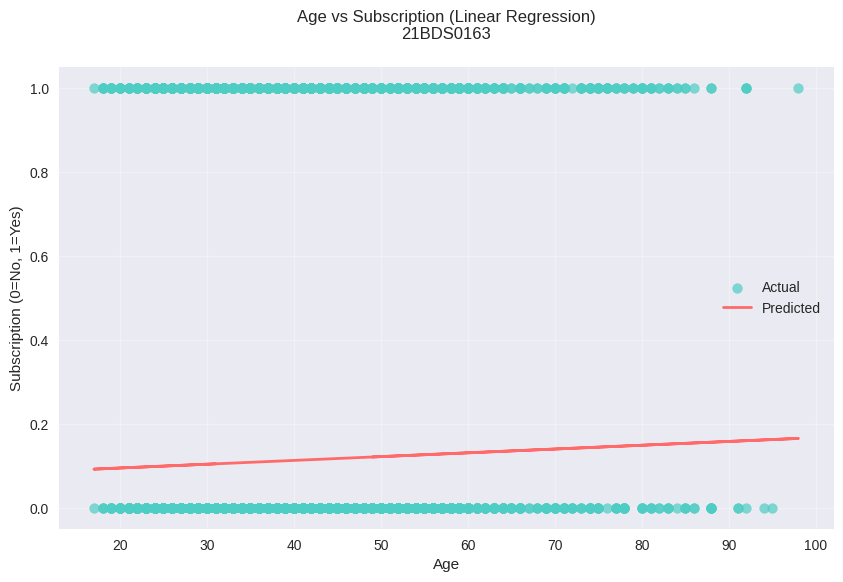

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(X_test['age'], y_test_numeric, color='#4ECDC4', alpha=0.7, label='Actual')
plt.plot(X_test['age'], y_pred, color='#FF6B6B', linewidth=2, label='Predicted')
plt.title('Age vs Subscription (Linear Regression)\n21BDS0163', pad=20)
plt.xlabel('Age')
plt.ylabel('Subscription (0=No, 1=Yes)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Step 6: Multiple Linear Regression with Log Transformation
  
  6.1 Fit Model

In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Select multiple numeric features and apply log transformation
X_train_log = np.log1p(X_train[['age', 'duration', 'campaign']])  # log(x+1) transform
X_train_log.fillna(0, inplace=True)  # Handle any infinite values

# Convert target to numeric
y_train_numeric = np.where(y_train == 'yes', 1, 0)

# Fit multiple regression
multi_model = LinearRegression()
multi_model.fit(X_train_log, y_train_numeric)

# Print coefficients
print("Regression Coefficients:")
for feature, coef in zip(['age', 'duration', 'campaign'], multi_model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {multi_model.intercept_:.4f}")
print("\n21BDS0163 - Multiple regression with log transform fitted")

Regression Coefficients:
age: -0.0003
duration: 0.1211
campaign: -0.0062
Intercept: -0.5056

21BDS0163 - Multiple regression with log transform fitted


6.2 Residuals and Prediction:

In [56]:
# Prepare test data with same transformations
X_test_log = np.log1p(X_test[['age', 'duration', 'campaign']])
X_test_log.fillna(0, inplace=True)
y_test_numeric = np.where(y_test == 'yes', 1, 0)

# Make predictions
y_pred = multi_model.predict(X_test_log)

# Calculate residuals
residuals = y_test_numeric - y_pred

# Print key metrics
print("Prediction and Residual Summary:")
print(f"First 5 Predictions: {y_pred[:5].round(4)}")
print(f"Mean Absolute Residual: {np.mean(np.abs(residuals)):.4f}")
print(f"Max Positive Residual: {np.max(residuals):.4f}")
print(f"Max Negative Residual: {np.min(residuals):.4f}")
print("\n21BDS0163 - Residuals calculated")

Prediction and Residual Summary:
First 5 Predictions: [-0.0583  0.0948  0.214   0.1161  0.2707]
Mean Absolute Residual: 0.1966
Max Positive Residual: 1.0703
Max Negative Residual: -0.4868

21BDS0163 - Residuals calculated


6.3 Create DataFrame for Predicted and Residuals:

In [57]:
# Create results DataFrame
results_df = pd.DataFrame({
    'Actual': y_test,
    'Actual_Numeric': y_test_numeric,
    'Predicted': y_pred,
    'Residual': residuals,
    'Age': X_test['age'],
    'Duration': X_test['duration']
})

# Show first 5 rows
print("Prediction Results:")
print(results_df.head().round(4))
print("\n21BDS0163 - Results DataFrame created")

Prediction Results:
      Actual  Actual_Numeric  Predicted  Residual  Age  Duration
9923      no               0    -0.0583    0.0583   49        41
3477      no               0     0.0948   -0.0948   56       151
12077     no               0     0.2140   -0.2140   35       397
1579      no               0     0.1161   -0.1161   32       180
39993    yes               1     0.2707    0.7293   27       665

21BDS0163 - Results DataFrame created


Step 7: Visualize with ggplot or qqPlot

7.1 Visualize Residuals vs. Predictions:

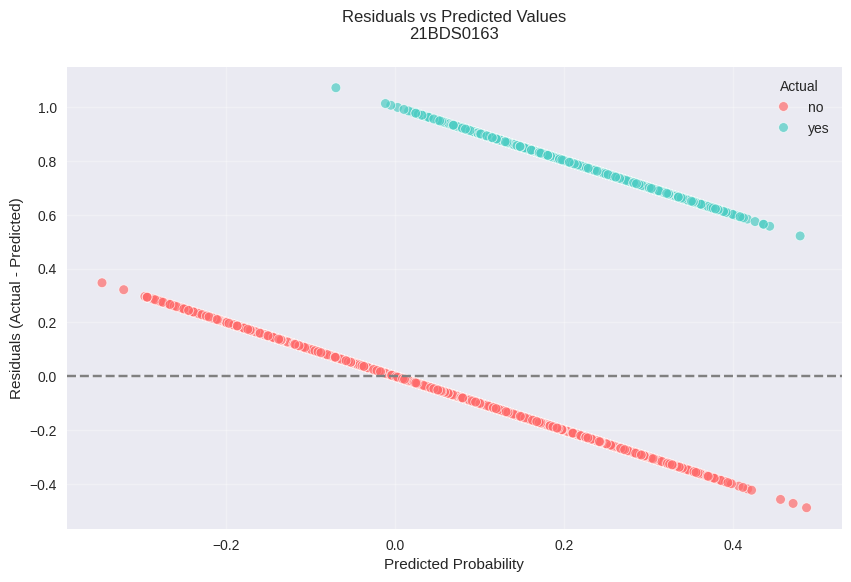

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Residuals vs Predictions plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=results_df['Predicted'], y=results_df['Residual'],
                hue=results_df['Actual'], palette=['#FF6B6B', '#4ECDC4'], alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Residuals vs Predicted Values\n21BDS0163', pad=20)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(alpha=0.3)
plt.show()

7.2 QQ Plot:

<Figure size 800x600 with 0 Axes>

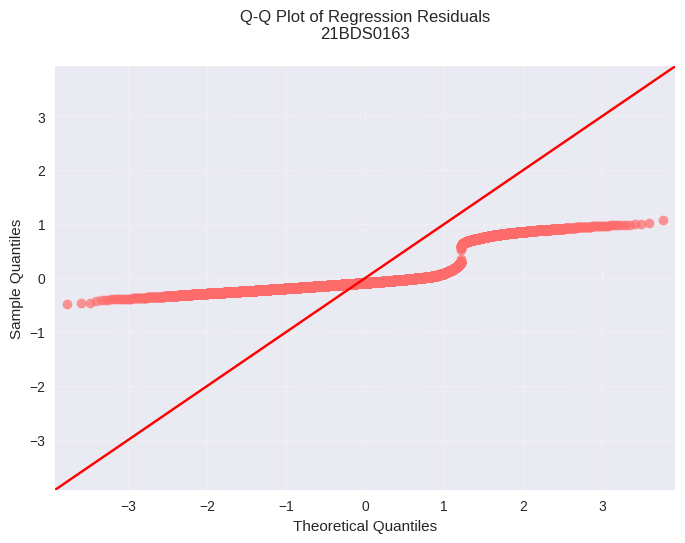

In [59]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sm.qqplot(results_df['Residual'], line='45',
          markerfacecolor='#FF6B6B', markeredgecolor='#FF6B6B', alpha=0.7)
plt.title('Q-Q Plot of Regression Residuals\n21BDS0163', pad=20)
plt.grid(alpha=0.3, linestyle='--')
plt.show()

Step 8: Logistic Regression Implementation:

Scatter Plot Clusters: Since the diagnosis is binary (benign vs. malignant), a simple regression line may not provide meaningful insights. The plot may show discrete points, making the regression line less informative.

Regression Line Appearance: A simple linear regression line may not be suitable for binary classification tasks, as the slope of the line might not be very meaningful.

Let us Consider switching to Logistic Regression, which is designed for classification tasks like this.

8.1 Import the necessary library

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

8.2 Prepare the data for Logistic Regression

In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Convert target to binary numeric
le = LabelEncoder()
y_logreg = le.fit_transform(y)  # yes->1, no->0

# 2. Select features and encode categorical variables
X_logreg = pd.get_dummies(df.drop('y', axis=1))

# 3. Split into train/test sets (stratified)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_logreg, y_logreg, test_size=0.3, random_state=42, stratify=y_logreg
)

# 4. Scale numeric features
scaler = StandardScaler()
X_train_log_scaled = scaler.fit_transform(X_train_log)
X_test_log_scaled = scaler.transform(X_test_log)

print("Data prepared for logistic regression")
print(f"Training shape: {X_train_log_scaled.shape}")
print(f"Test shape: {X_test_log_scaled.shape}")
print("21BDS0163 - Data preparation complete")

Data prepared for logistic regression
Training shape: (28831, 63)
Test shape: (12357, 63)
21BDS0163 - Data preparation complete


8.3 Fit Logistic Regression to the training set

In [62]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_log_scaled, y_train_log)

# Print coefficients
print("Logistic Regression Coefficients:")
for feature, coef in zip(X_logreg.columns, logreg.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {logreg.intercept_[0]:.4f}")
print("\n21BDS0163 - Model trained successfully")

Logistic Regression Coefficients:
age: 0.0029
duration: 1.2278
campaign: -0.0983
pdays: -0.1958
previous: -0.0570
emp.var.rate: -2.2621
cons.price.idx: 0.8508
cons.conf.idx: 0.0258
euribor3m: 1.0381
nr.employed: -0.2903
job_admin.: 0.0328
job_blue-collar: -0.0749
job_entrepreneur: -0.0149
job_housemaid: -0.0037
job_management: 0.0116
job_retired: 0.0782
job_self-employed: -0.0466
job_services: -0.0171
job_student: 0.0283
job_technician: 0.0227
job_unemployed: 0.0126
job_unknown: 0.0055
marital_divorced: -0.0056
marital_married: -0.0185
marital_single: 0.0229
marital_unknown: 0.0116
education_basic.4y: -0.0248
education_basic.6y: 0.0276
education_basic.9y: -0.0461
education_high.school: -0.0116
education_illiterate: 0.0200
education_professional.course: -0.0143
education_university.degree: 0.0469
education_unknown: 0.0257
default_no: 0.0624
default_unknown: -0.0597
default_yes: -0.1057
housing_no: 0.0117
housing_unknown: 0.0123
housing_yes: -0.0155
loan_no: -0.0040
loan_unknown: 0.0123


8.4 Predict the test set results

In [63]:
# Make predictions (class and probabilities)
y_pred = logreg.predict(X_test_log_scaled)
y_pred_proba = logreg.predict_proba(X_test_log_scaled)[:, 1]  # Probability of class 1 ('yes')

# Create results DataFrame
results_df = pd.DataFrame({
    'Actual': y_test_log,
    'Predicted': y_pred,
    'Probability': y_pred_proba
})

# Print first 5 predictions
print("Test Set Predictions:")
print(results_df.head())
print("\n21BDS0163 - Predictions completed")

Test Set Predictions:
   Actual  Predicted  Probability
0       0          0     0.013756
1       0          0     0.005608
2       0          0     0.053691
3       0          0     0.006791
4       1          1     0.940569

21BDS0163 - Predictions completed


8.5 Evaluate the model

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Classification Report
print("="*50)
print("Classification Report:".center(50))
print("="*50)
print(classification_report(y_test_log, y_pred, target_names=['No', 'Yes']))

# 2. Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred)
print("\nConfusion Matrix:")
print(pd.DataFrame(cm,
                   index=['Actual No', 'Actual Yes'],
                   columns=['Predicted No', 'Predicted Yes']))

# 3. ROC-AUC Score
print(f"\nROC-AUC Score: {roc_auc_score(y_test_log, y_pred_proba):.4f}")

# 4. Accuracy
print(f"Accuracy: {logreg.score(X_test_log_scaled, y_test_log):.4f}")
print("\n21BDS0163 - Model evaluation complete")

              Classification Report:              
              precision    recall  f1-score   support

          No       0.93      0.97      0.95     10965
         Yes       0.68      0.42      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357


Confusion Matrix:
            Predicted No  Predicted Yes
Actual No          10682            283
Actual Yes           803            589

ROC-AUC Score: 0.9383
Accuracy: 0.9121

21BDS0163 - Model evaluation complete


8.6 Visualize the Logistic Regression result

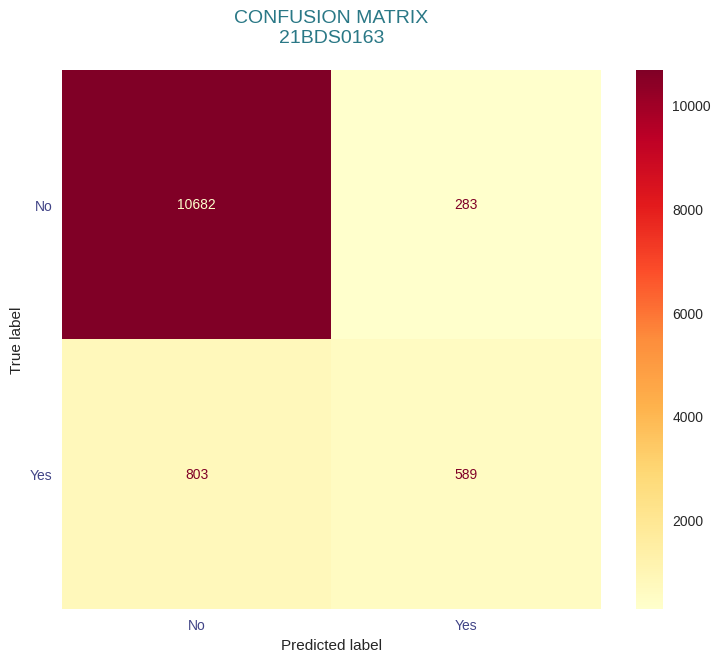

<Figure size 900x700 with 0 Axes>

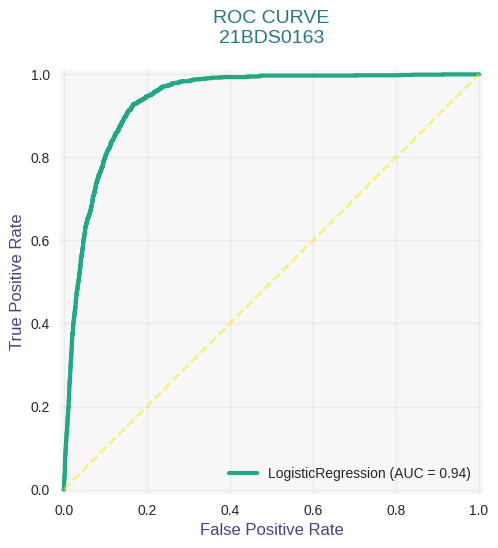

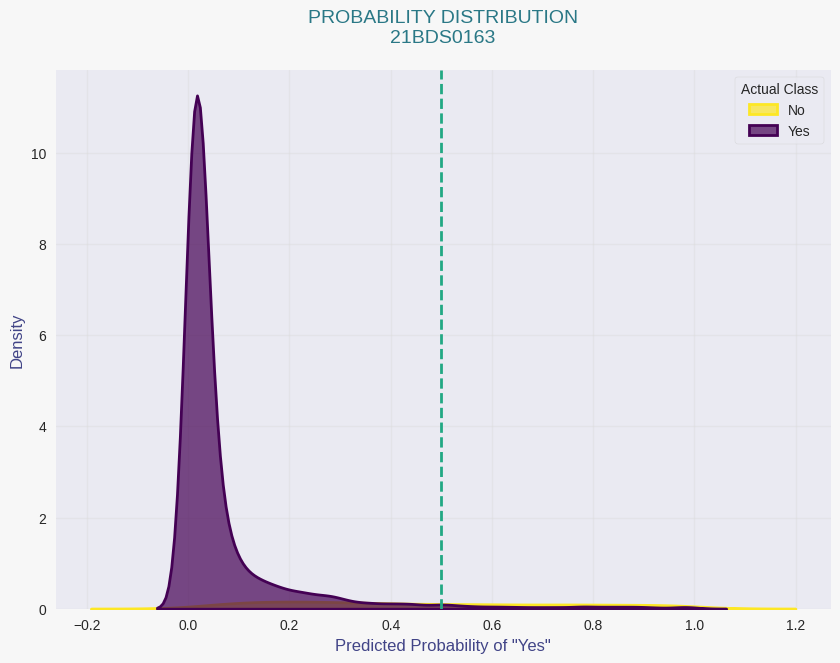

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

# Set aesthetic style
plt.style.use('seaborn-v0_8-dark')
sns.set_palette("husl")

# 1. Confusion Matrix (Sunset Color Theme)
plt.figure(figsize=(9,7))
ax = plt.subplot()
ConfusionMatrixDisplay.from_estimator(logreg, X_test_log_scaled, y_test_log,
                                    display_labels=['No', 'Yes'],
                                    cmap='YlOrRd', ax=ax)
plt.title('CONFUSION MATRIX\n21BDS0163',
          fontsize=14, pad=20, color='#2A7886')
plt.grid(False)
ax.tick_params(colors='#414487', labelsize=10)
plt.show()

# 2. ROC Curve (Neon Glow Style)
plt.figure(figsize=(9,7))
RocCurveDisplay.from_estimator(logreg, X_test_log_scaled, y_test_log,
                              color='#22A884', linewidth=3)
plt.plot([0, 1], [0, 1], linestyle='--', color='#FDE725', alpha=0.6)
plt.title('ROC CURVE\n21BDS0163',
          fontsize=14, pad=20, color='#2A7886')
plt.xlabel('False Positive Rate', fontsize=12, color='#414487')
plt.ylabel('True Positive Rate', fontsize=12, color='#414487')
plt.grid(color='#D9D9D9', alpha=0.4)
plt.gca().set_facecolor('#F7F7F7')
plt.show()

# 3. Probability Distribution (Duo-Tone Gradient)
plt.figure(figsize=(10,7), facecolor='#F7F7F7')
sns.kdeplot(data=results_df, x='Probability', hue='Actual',
            palette=['#440154', '#FDE725'],
            fill=True, alpha=0.7, linewidth=2)
plt.title('PROBABILITY DISTRIBUTION\n21BDS0163',
          fontsize=14, pad=20, color='#2A7886')
plt.xlabel('Predicted Probability of "Yes"', fontsize=12, color='#414487')
plt.ylabel('Density', fontsize=12, color='#414487')
plt.axvline(0.5, color='#22A884', linestyle='--', linewidth=2)
plt.legend(title='Actual Class', title_fontsize=10,
           labels=['No', 'Yes'], frameon=True)
plt.grid(color='#D9D9D9', alpha=0.4)
sns.despine()
plt.show()